# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
# load the data
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded["used_device_data.csv"]))


Saving used_device_data.csv to used_device_data.csv


## Data Overview

In [3]:
# return the first five rows
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:
# return the last five rows
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [5]:
# returns the number of rows by the number of columns
df.shape

(3454, 15)

Observations:
There are 3454 rows and 15 columns


In [6]:
# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observatios:


*   

    Most of the columns in the data are numeric in nature ('int64' or 'float64' type).

   

*    The brand_name,os,4g and 5g columns are string columns ('object' type).









In [7]:
# drop "brand_name" and "os" columns
#columns_to_drop = ["brand_name", "os"]
#df = df.drop(columns_to_drop, axis=1)

In [8]:
# check missing values across each columns
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observations:

*   There are 179 missing value from 'main_camera_mp' column
*   There are few others from selfie_camera_mp (2),int_memory(4),ram (4),battery (6),
weight (7) columns.

In [9]:
# check statistical summary of the all data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


Observations: There are two unique values for '4g' and '5g' columns, 34 unique values for brand name and 4 unique values for OS on which device runs

In [10]:
# check statistical summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


Observations:

*   Release years are ranging from 2013 to 2020
*   Average days used for the cell phones is 690 days that is about two years.The range is changing from 3 months to 3 years.
*   Difference between averages of normalized price of a new and old device of the same model is about 1 in euros.






In [11]:
# check for duplicates
duplicates = df.duplicated()
# print the duplicated rows
print(df[duplicates])

Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []


Observation: There is no dublicate in data frame.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

#Univariate Analysis

In [12]:
# Lets write function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# Lets write a function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Lets check the distribution for columns that has numerical data!

**Observations on 'normalized_used_price'**

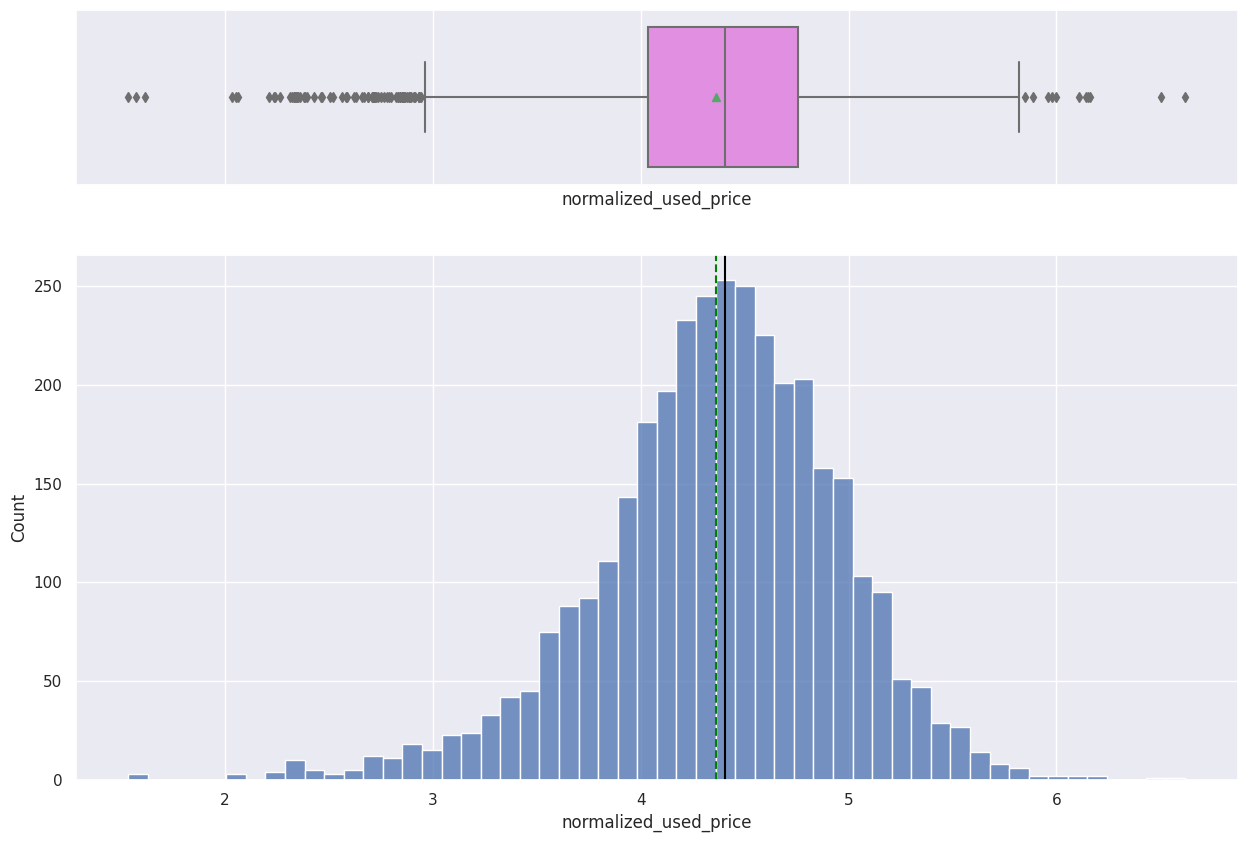

In [14]:
histogram_boxplot(df, 'normalized_used_price', figsize=(15, 10), kde=False, bins=None)



*   The distribution is normal distribution.

*  There are outliers.








**Observations on 'normalized_new_price'**

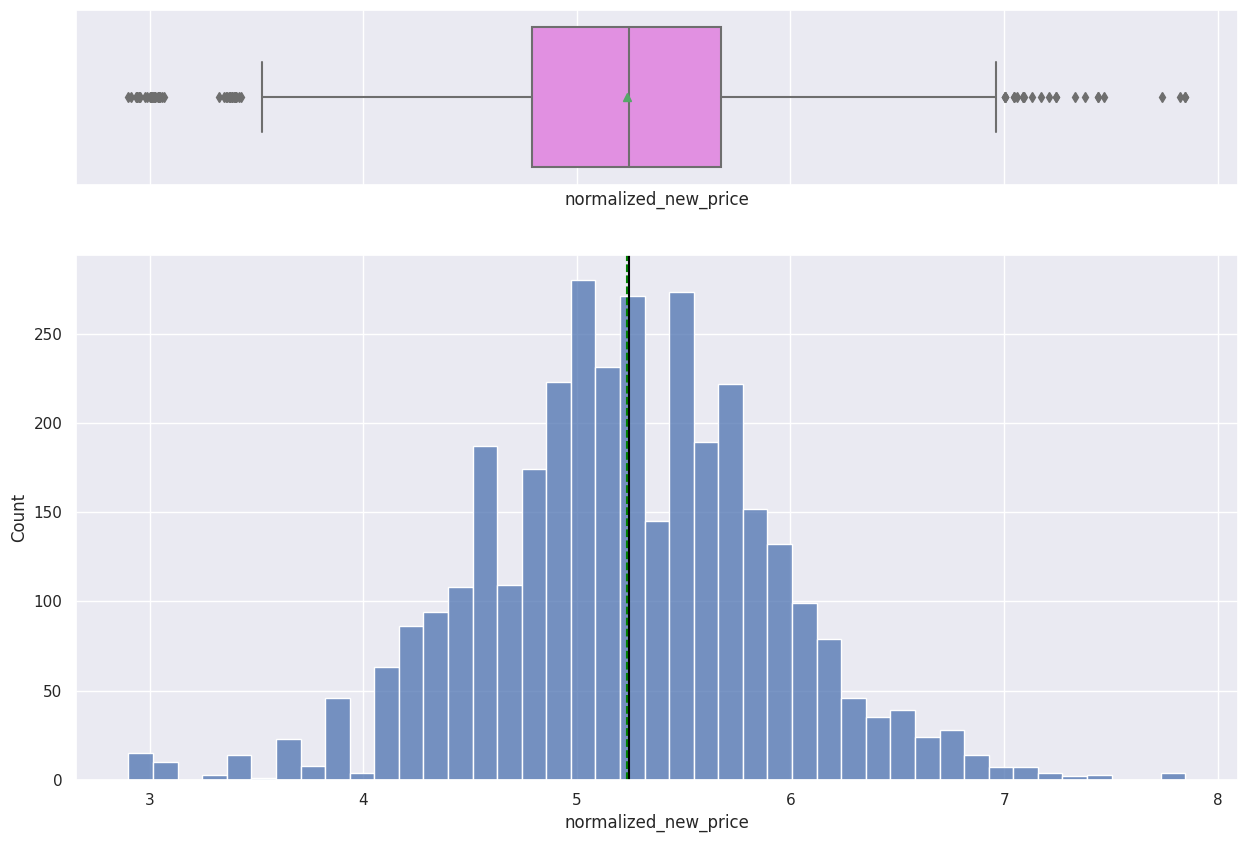

In [15]:
histogram_boxplot(df, 'normalized_new_price', figsize=(15, 10), kde=False, bins=None)

*   The distribution is normal distribution.

*  There are outliers.


**screen_size**

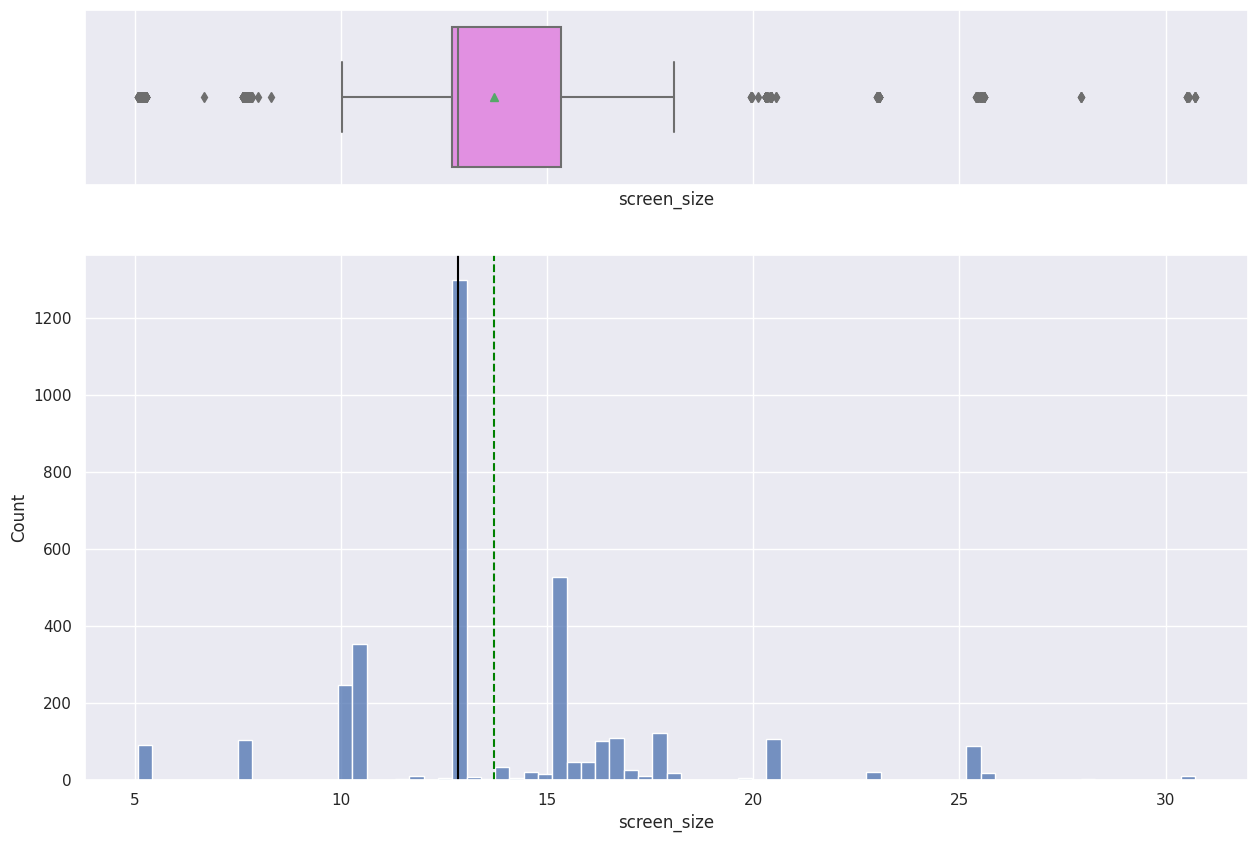

In [16]:
histogram_boxplot(df, 'screen_size', figsize=(15, 10), kde=False, bins=None)



*  Distribution is skewed right.
*  There are outliers.







**main_camera_mp**

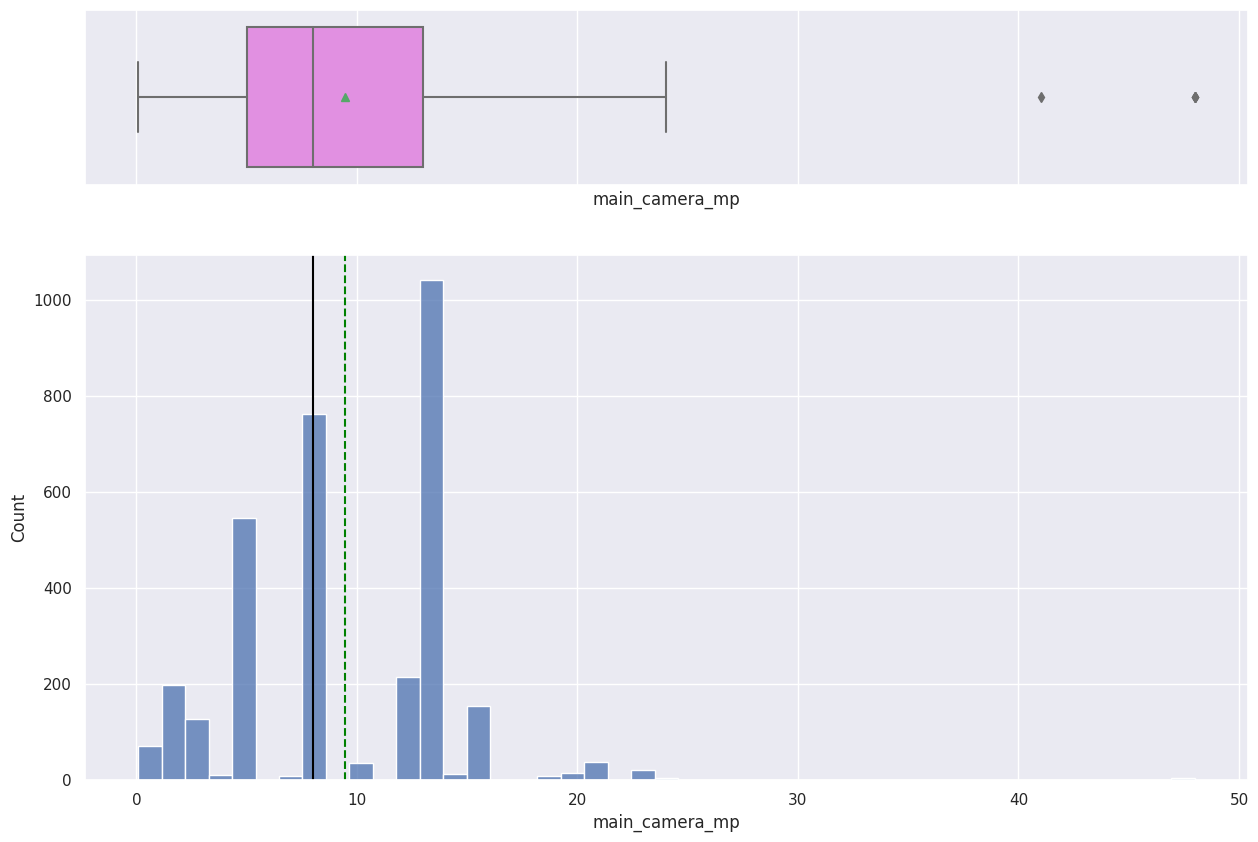

In [17]:
histogram_boxplot(df, 'main_camera_mp', figsize=(15, 10), kde=False, bins=None)

*  Distribution is skewed right.
*  There are only two outliers.


**selfie_camera_mp**

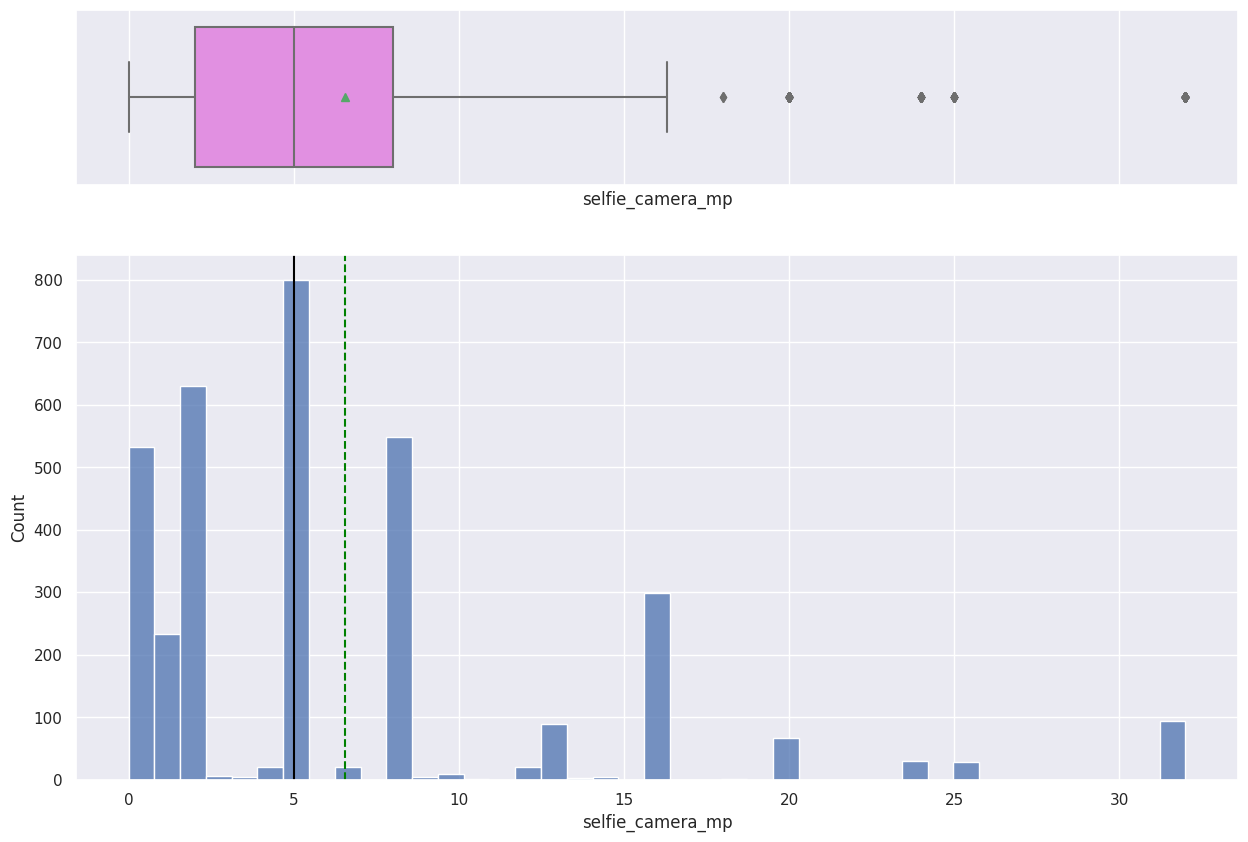

In [18]:
histogram_boxplot(df, 'selfie_camera_mp', figsize=(15, 10), kde=False, bins=None)


*  Distribution is skewed right.
*  There are outliers.



**int_memory**

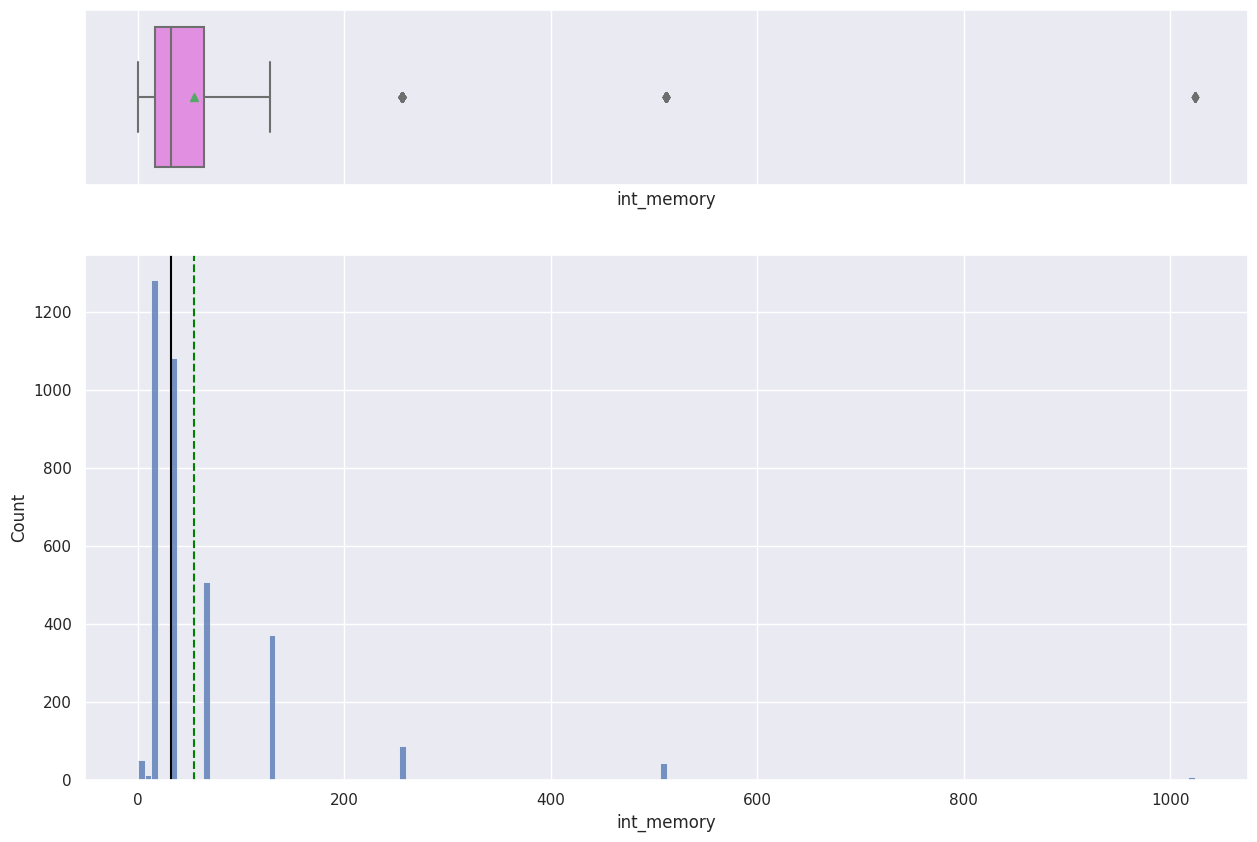

In [19]:
histogram_boxplot(df, 'int_memory', figsize=(15, 10), kde=False, bins=None)

*  Distribution is skewed right.
*  There are only three outliers.


**ram**

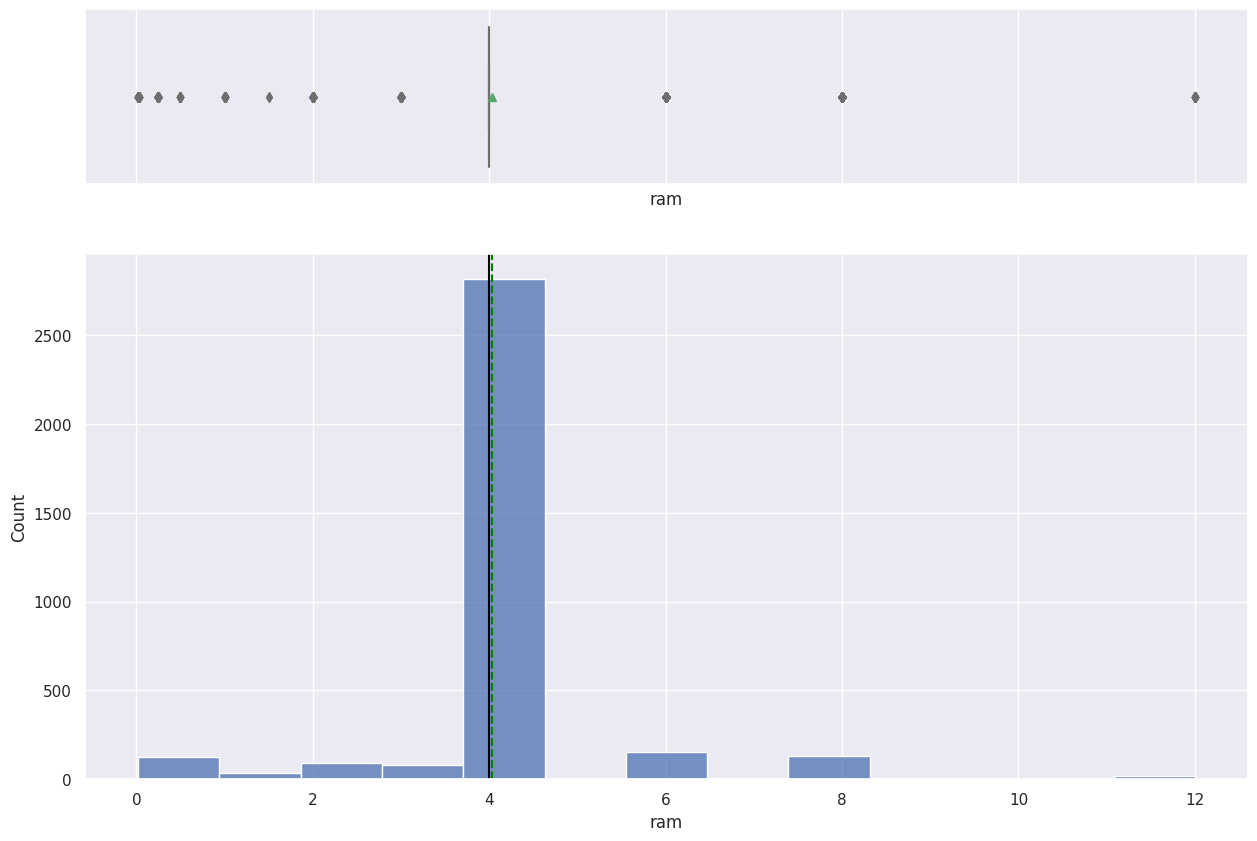

In [20]:
histogram_boxplot(df, 'ram', figsize=(15, 10), kde=False, bins=None)



*   Majorty of the used phones, over 2500, have 4 gb ram.




**weight**

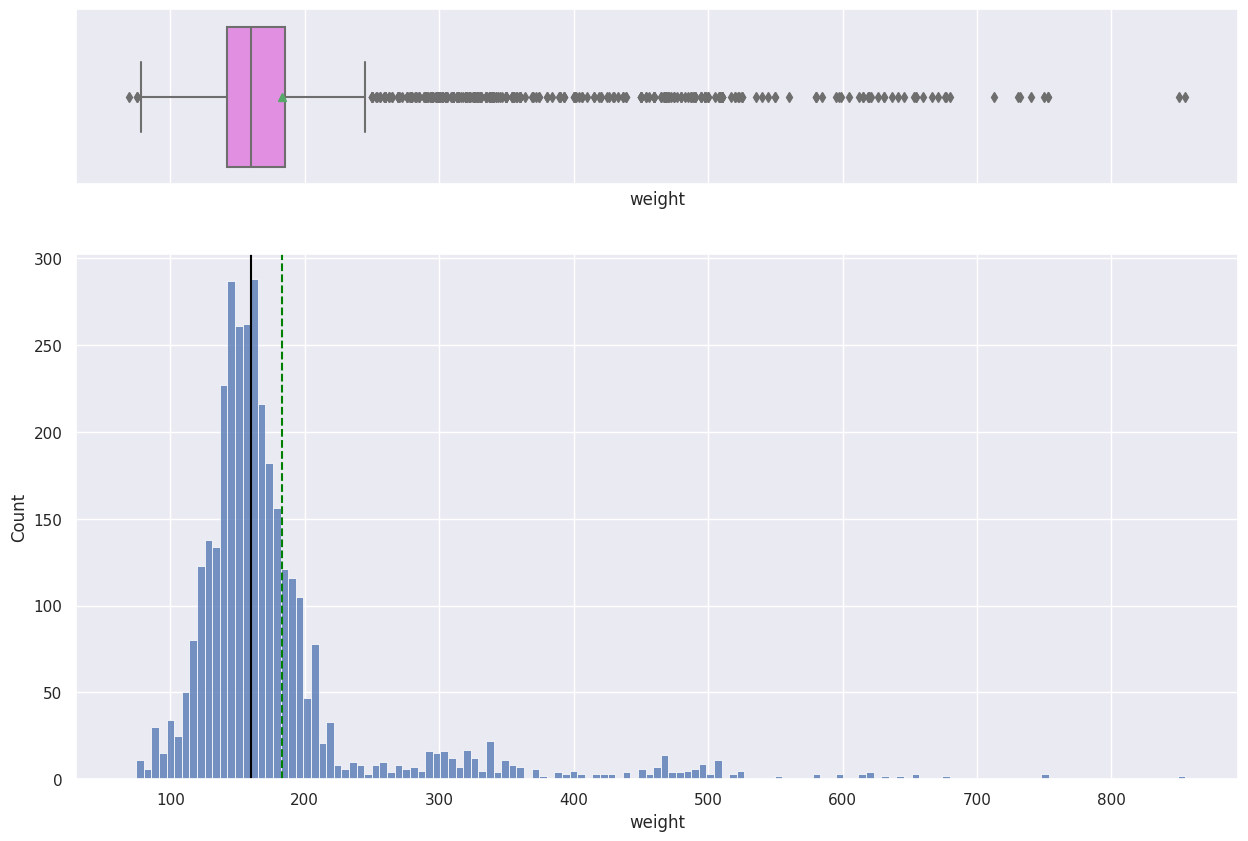

In [21]:
histogram_boxplot(df, 'weight', figsize=(15, 10), kde=False, bins=None)

*  Distribution is skewed right.
*  There are significantly many outliers. That means there are heavier cell phones than usual.

**battery**

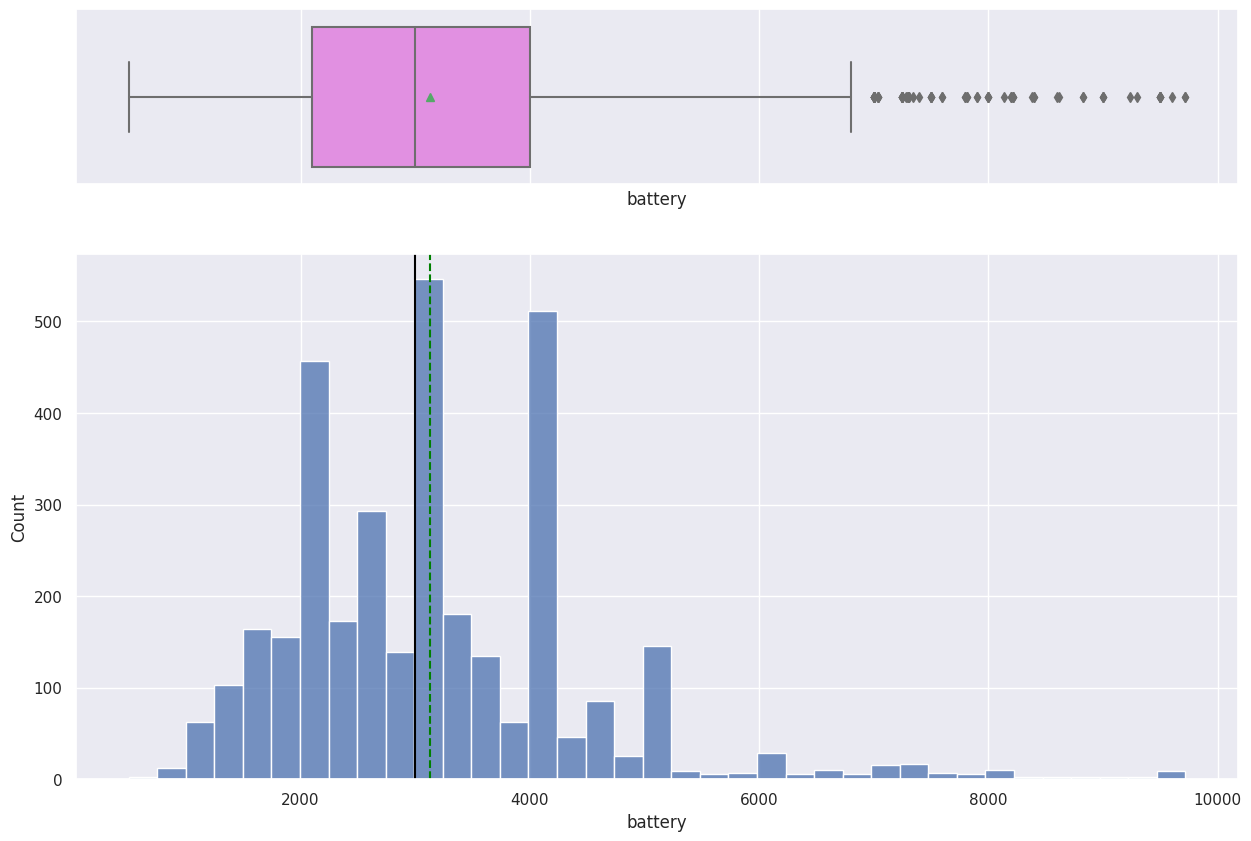

In [22]:
histogram_boxplot(df, 'battery', figsize=(15, 10), kde=False, bins=None)

*  Distribution is slightly skewed to the right.
*  There are outliers.

**days_used**

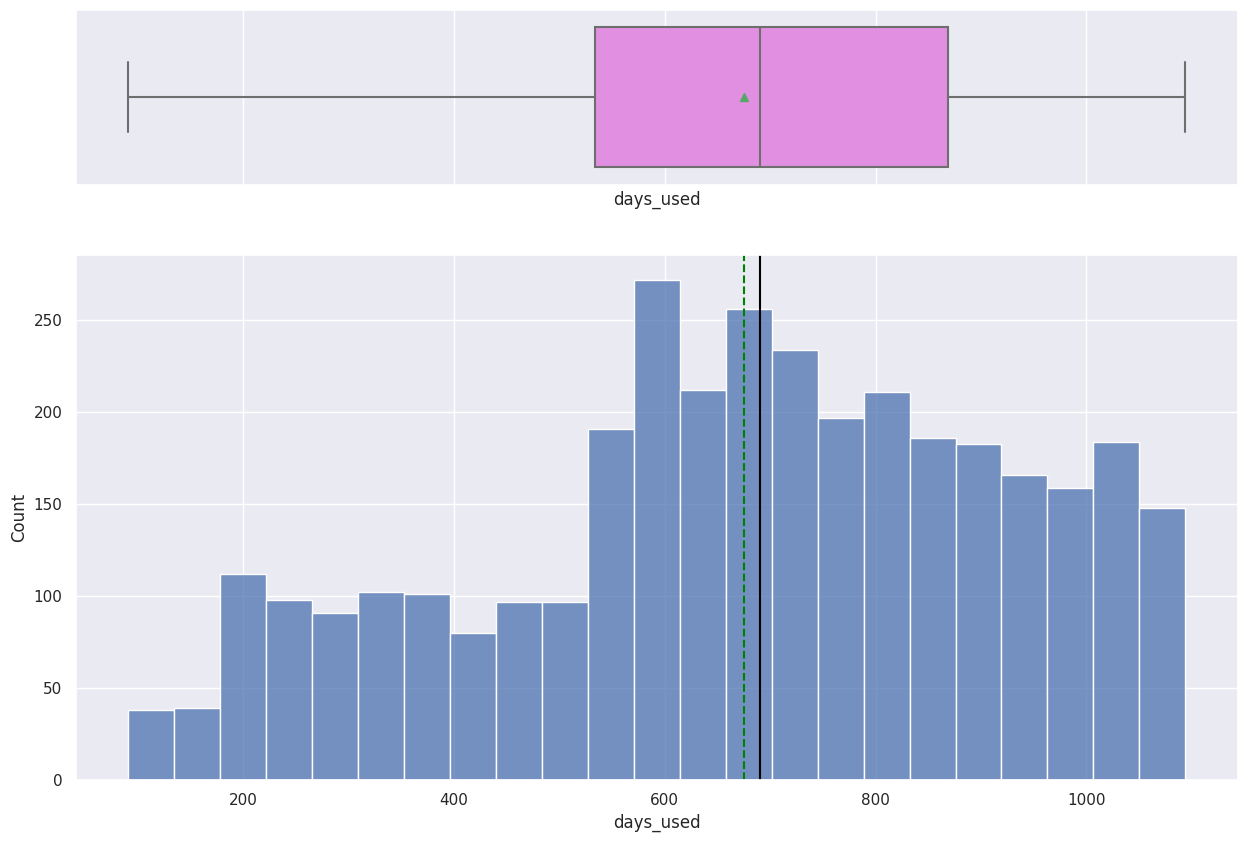

In [23]:
histogram_boxplot(df, 'days_used', figsize=(15, 10), kde=False, bins=None)

*  Distribution is slightly skewed to the left.
*  There is no outlier.

**Now, lets check the distribution for other columns.**

**brand_name**

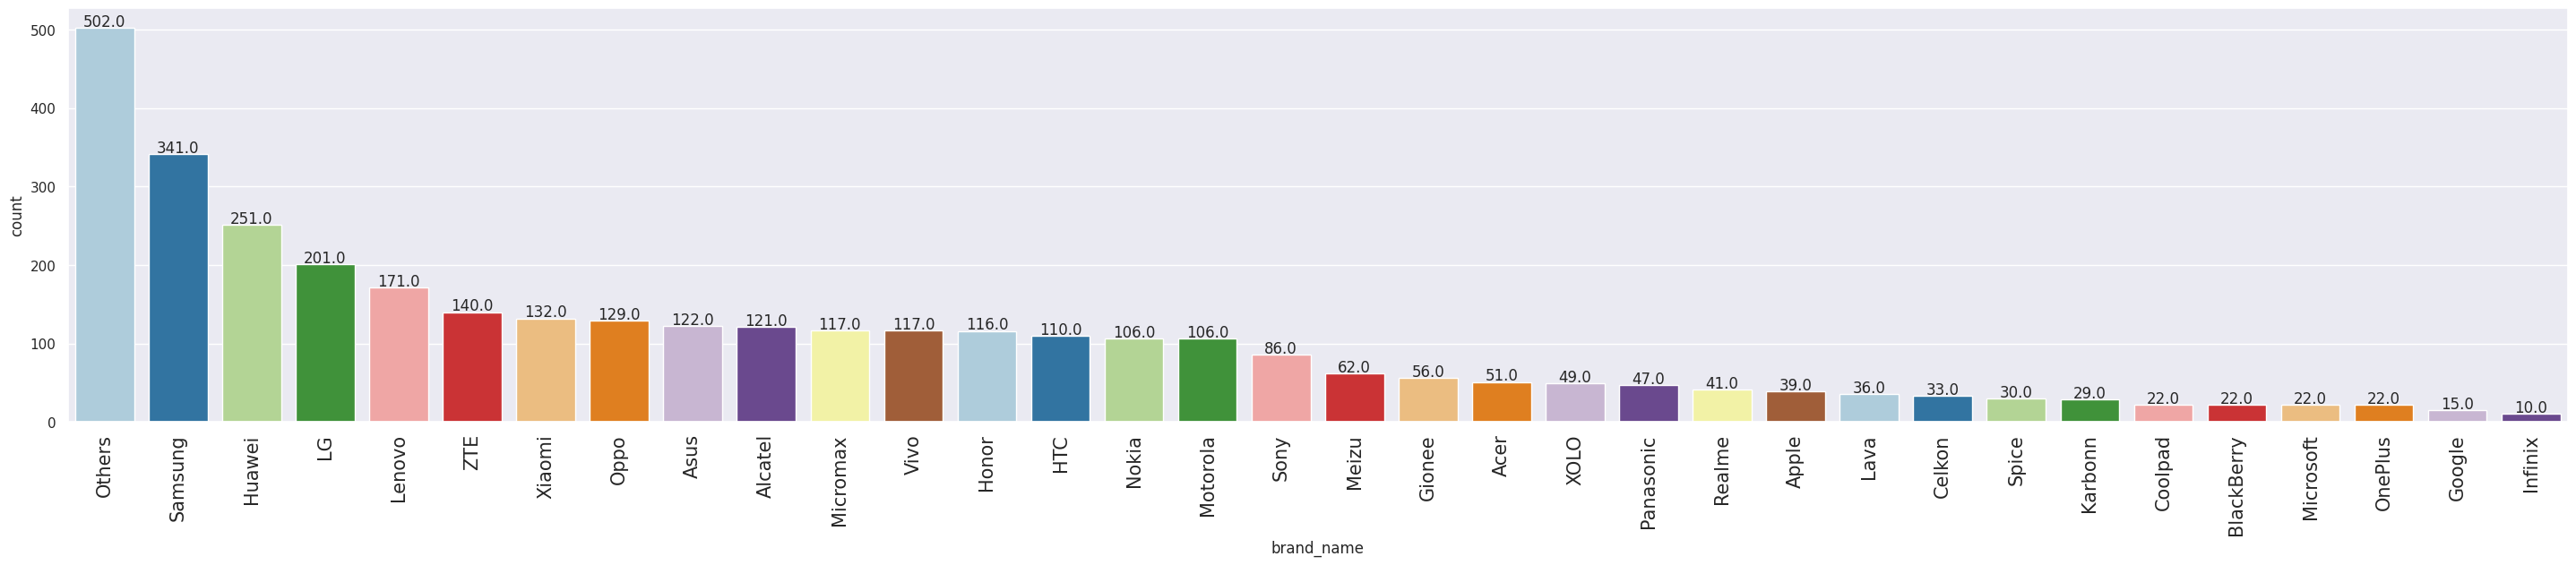

In [24]:
labeled_barplot(df, 'brand_name', perc=False, n=None)



*   Leading brands are Samsung, Huawei and LG in order.




**os**

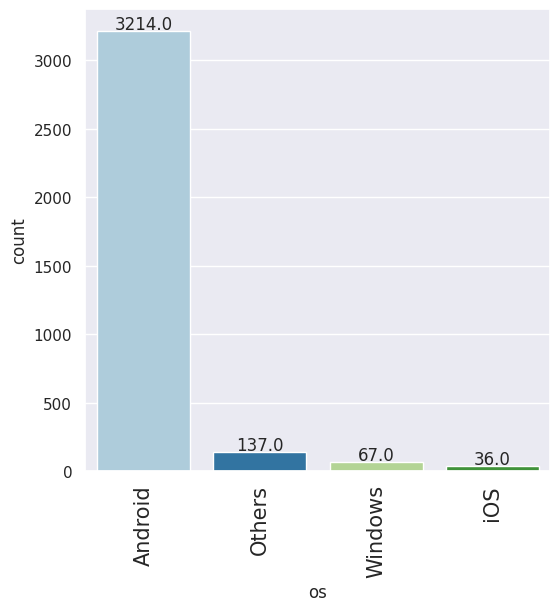

In [25]:
labeled_barplot(df, 'os', perc=False, n=None)



*   Majority of the cell phones are androids.




**4g**

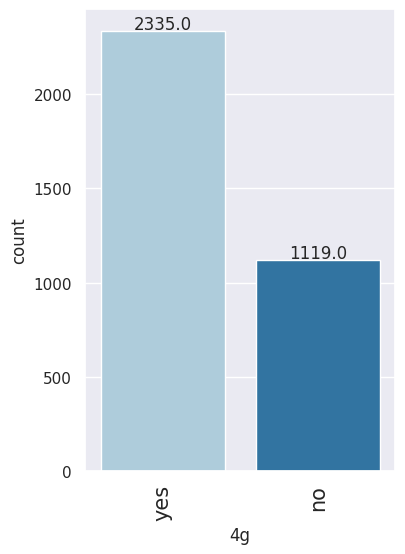

In [26]:
labeled_barplot(df, '4g', perc=False, n=None)



*   Almost 2/3 of the cell phones have 4g feature.



**5g**

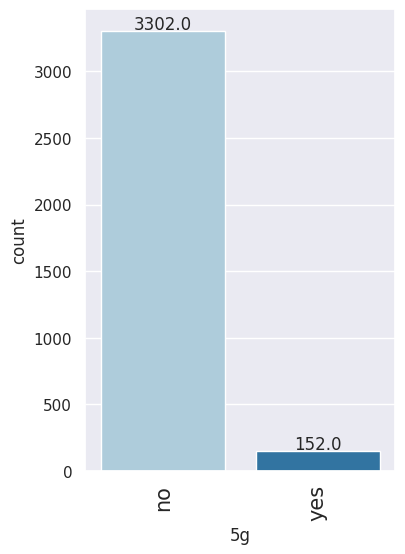

In [27]:
labeled_barplot(df, '5g', perc=False, n=None)



*   Very little of the cell phones (152) have 5 g feature.




**release_year**

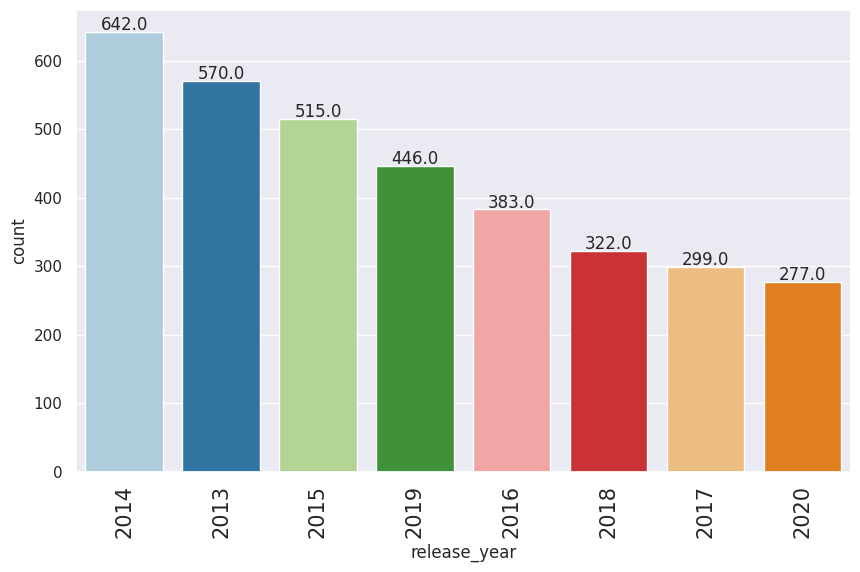

In [28]:
labeled_barplot(df, 'release_year', perc=False, n=None)



*   The most frequent release year is 2014 followed by 2013 and 2015.




#Bivariate Analysis

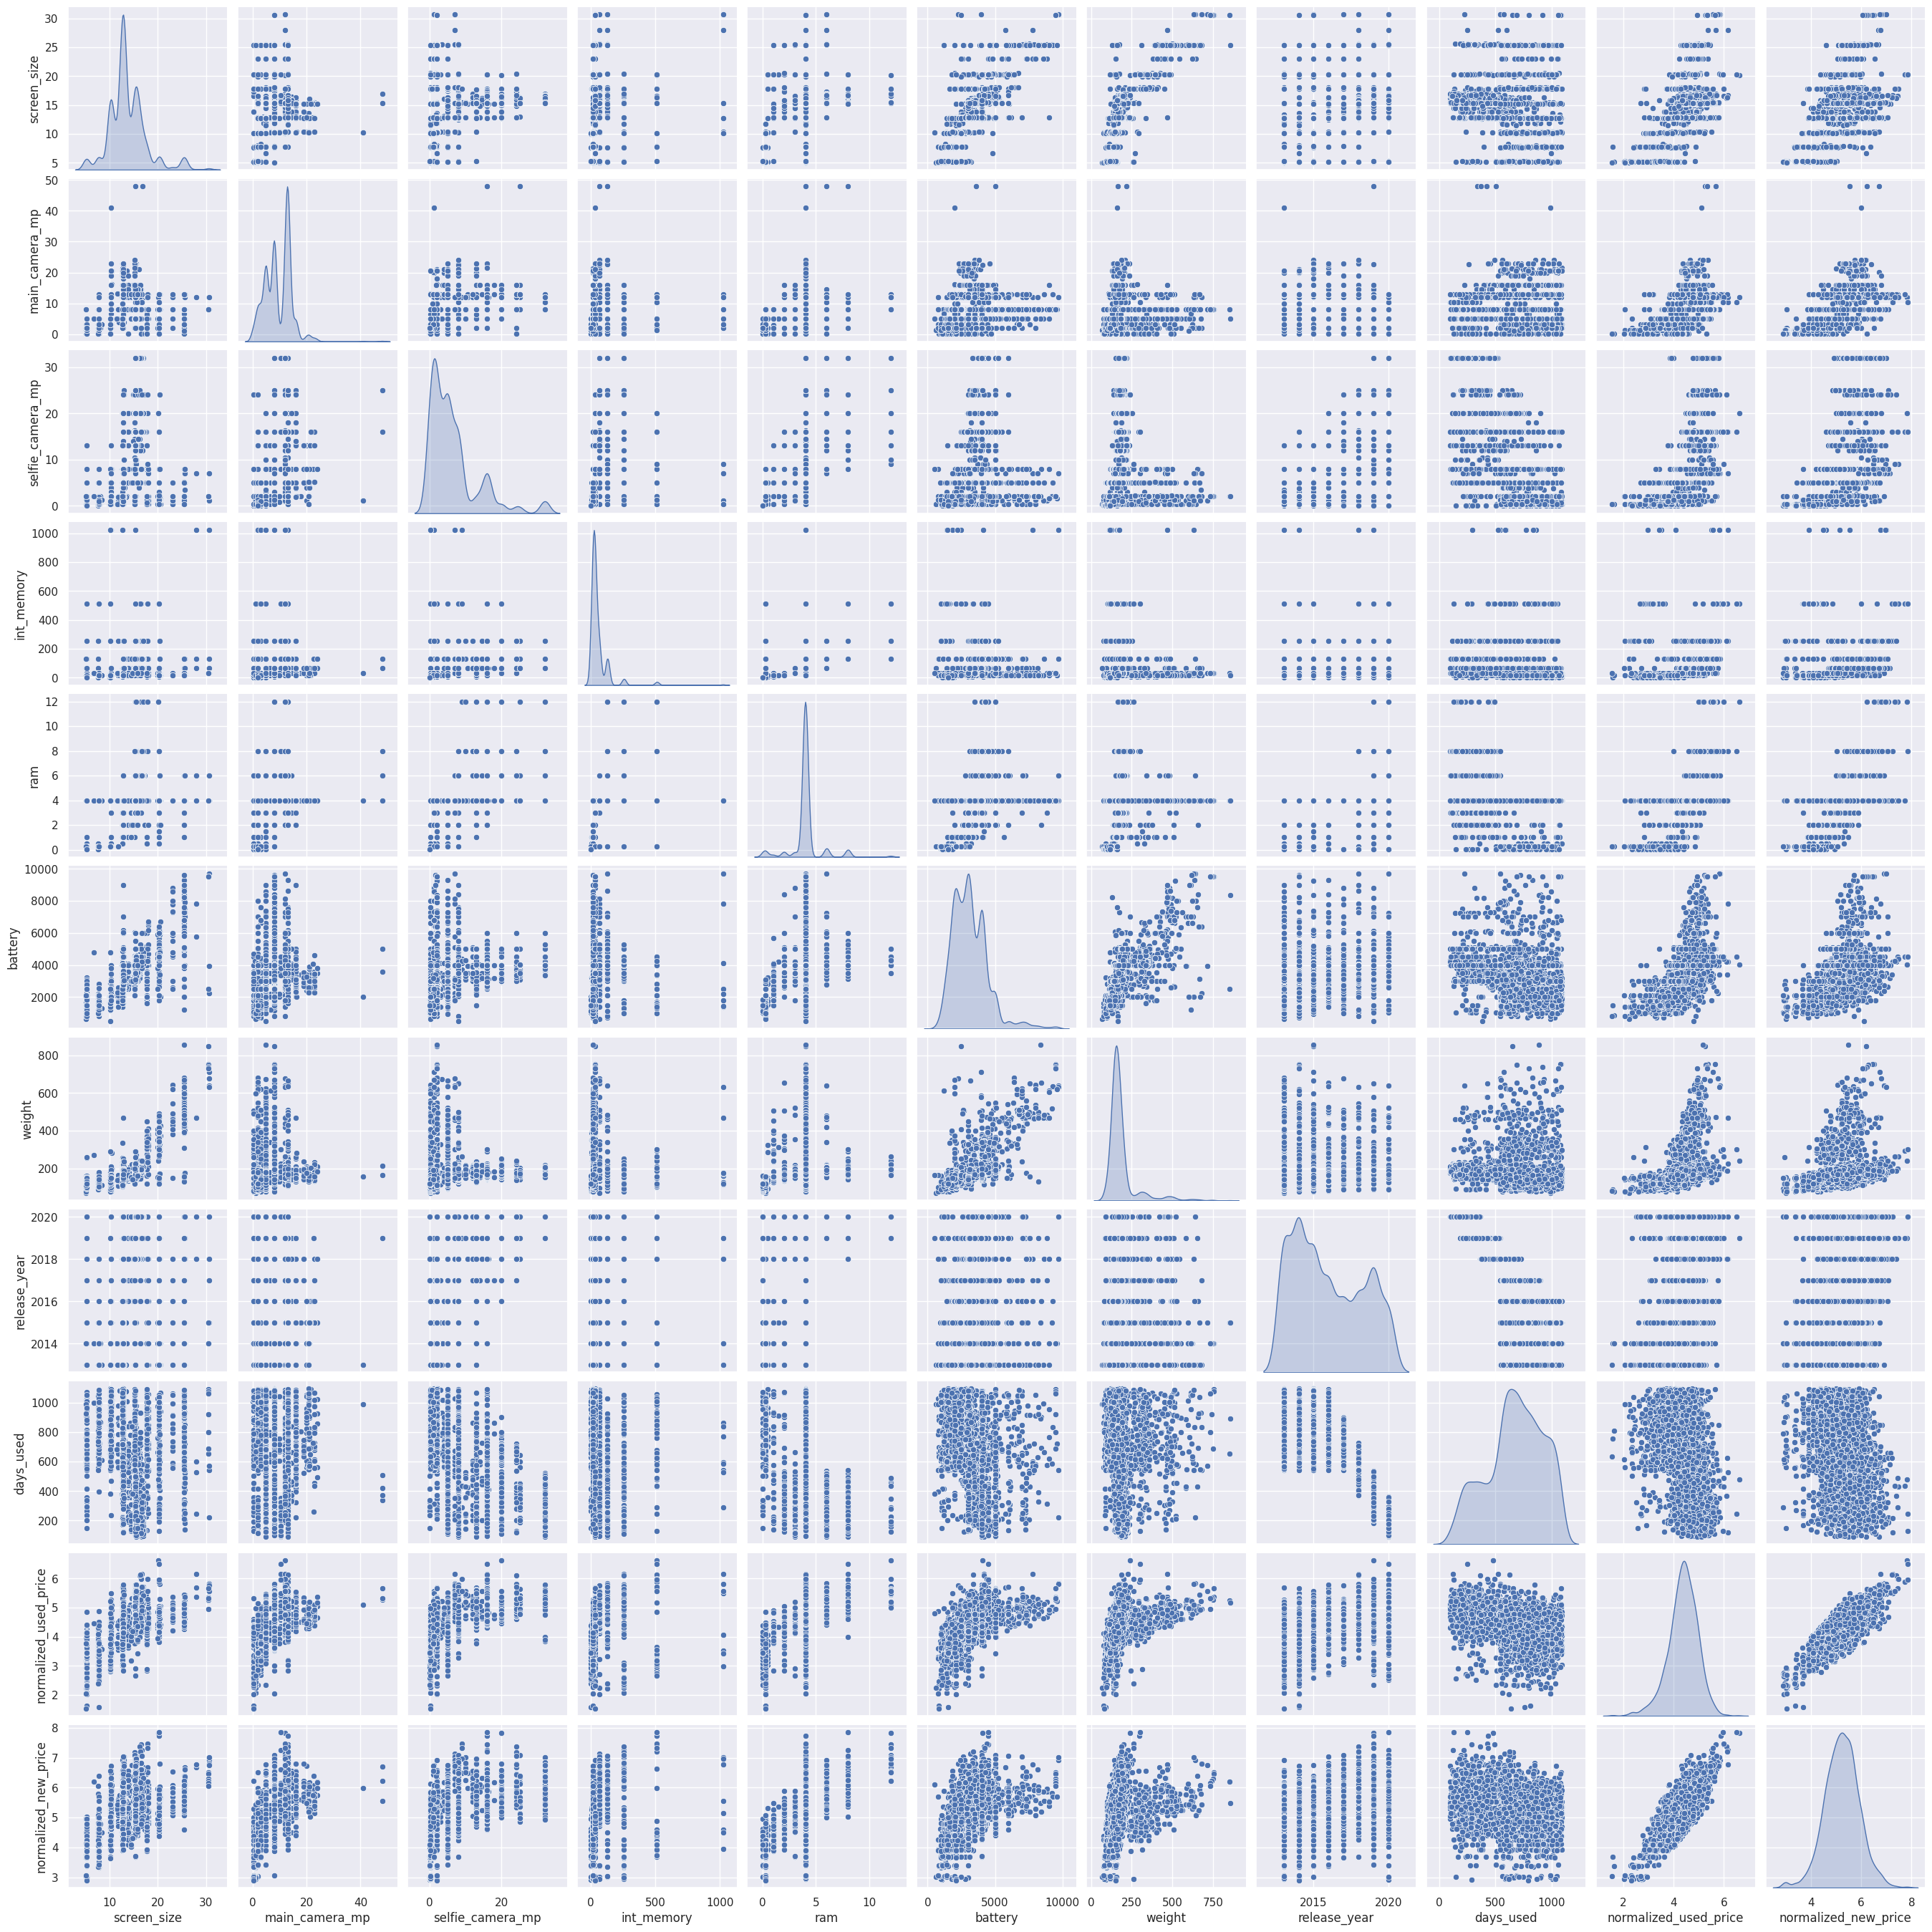

In [29]:
# to plot density curve instead of histogram on the diag
cData_attr = df.iloc[:, 0:15]
sns.pairplot(cData_attr, diag_kind="kde")  # to plot density curve instead of histogram on the diag



* normalized_used_price and normalized_new_price , weight and battery looks like have linear relationship.
* Several assumptions of classical linear regression seem to be violated



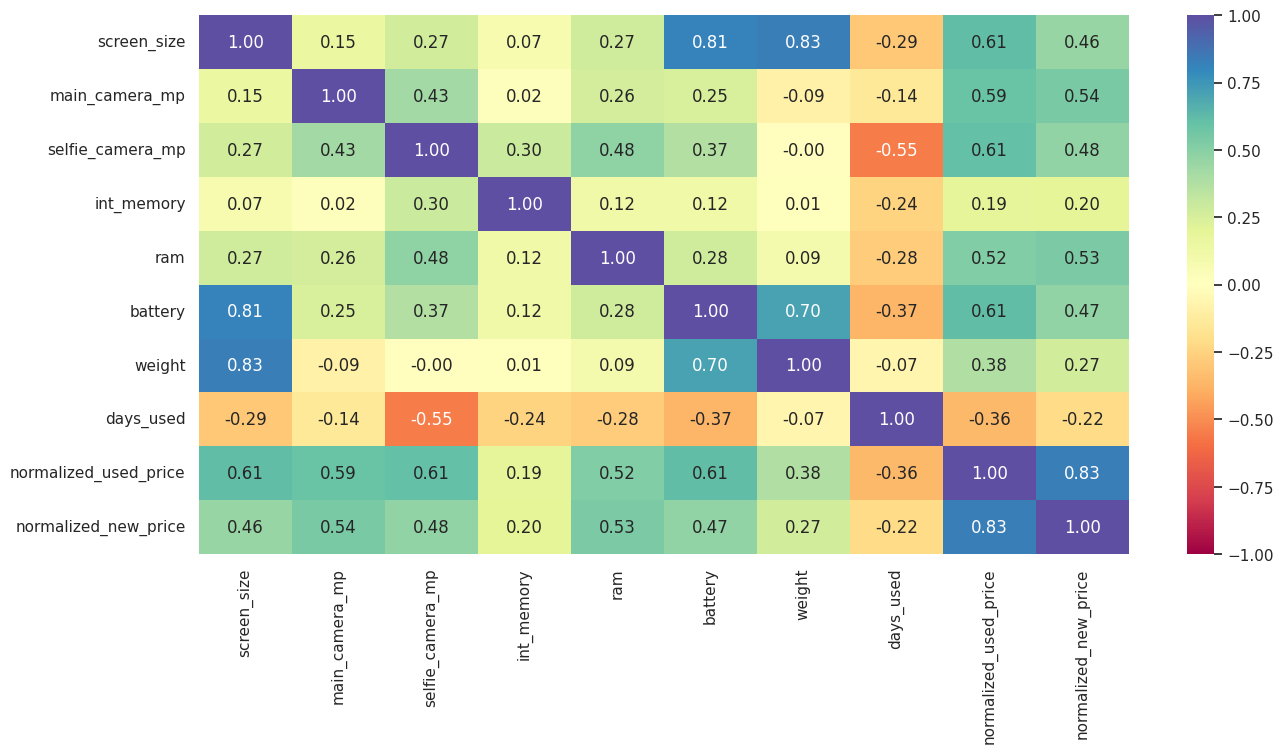

In [30]:
# drop release_year
c_list = df.select_dtypes(include=np.number).columns.tolist()

c_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[c_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()



*   As expected, normalized_used_price and normalized_new_price are highly correlated (r=.83)
*   As seen in matrix plot, weight and battery has high positive correlation (r=.70)


*   Battery and screen_size and weigth and screen_size have positive high correlation (r=.81, r=.83)


*   In general, normalized_used_price has positive correlation with other variables except days_used.









**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

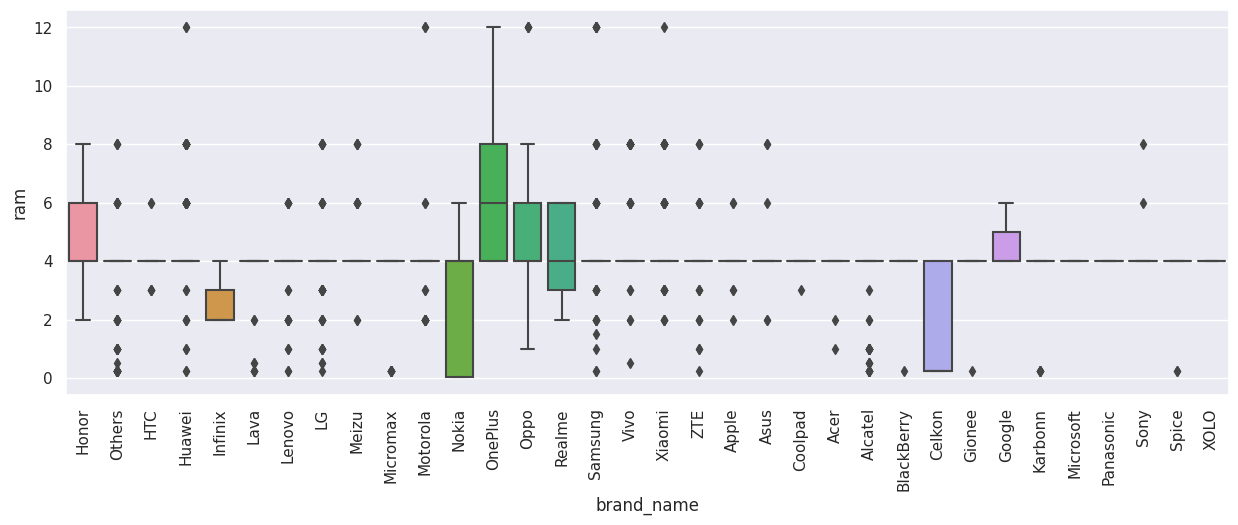

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()



*   OnePlus has the highest ram when we compare with other brands.
*   Nokia,Celkon and Infinix has lower ram median value than the average ram of the all brands.



 **A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [32]:
# create a new data frame for devices offering batteries more than 4500 mAh
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

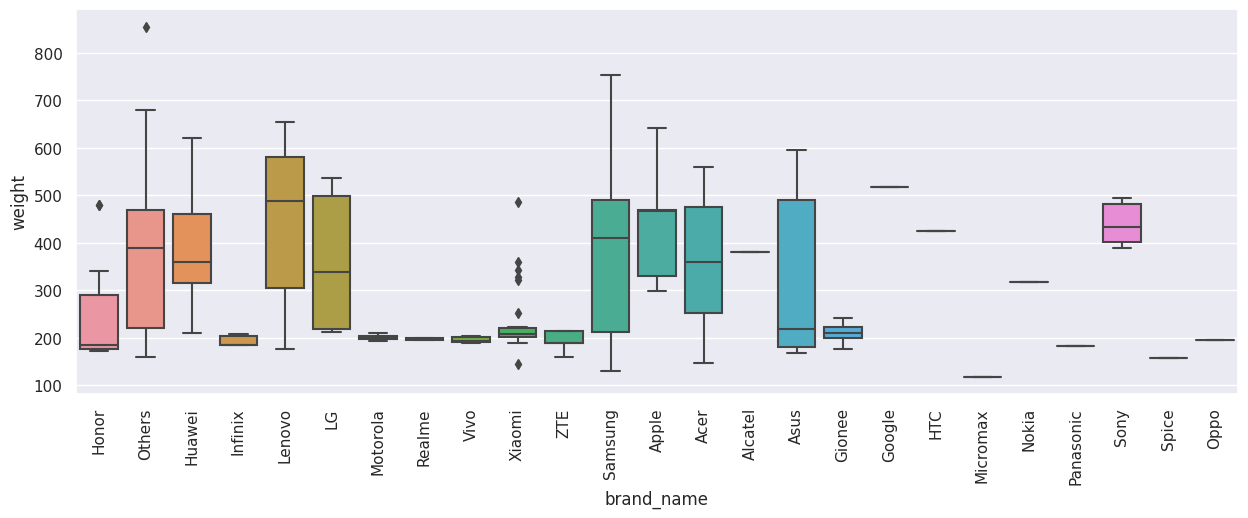

In [33]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()



*   Lenova, Sony and Samsung are the brands that have heavier devices.
*   Micromax has the lowest weight among brands that have large batteries.



**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [34]:
# create new data frame for devices with screen size larger than 6 inches
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

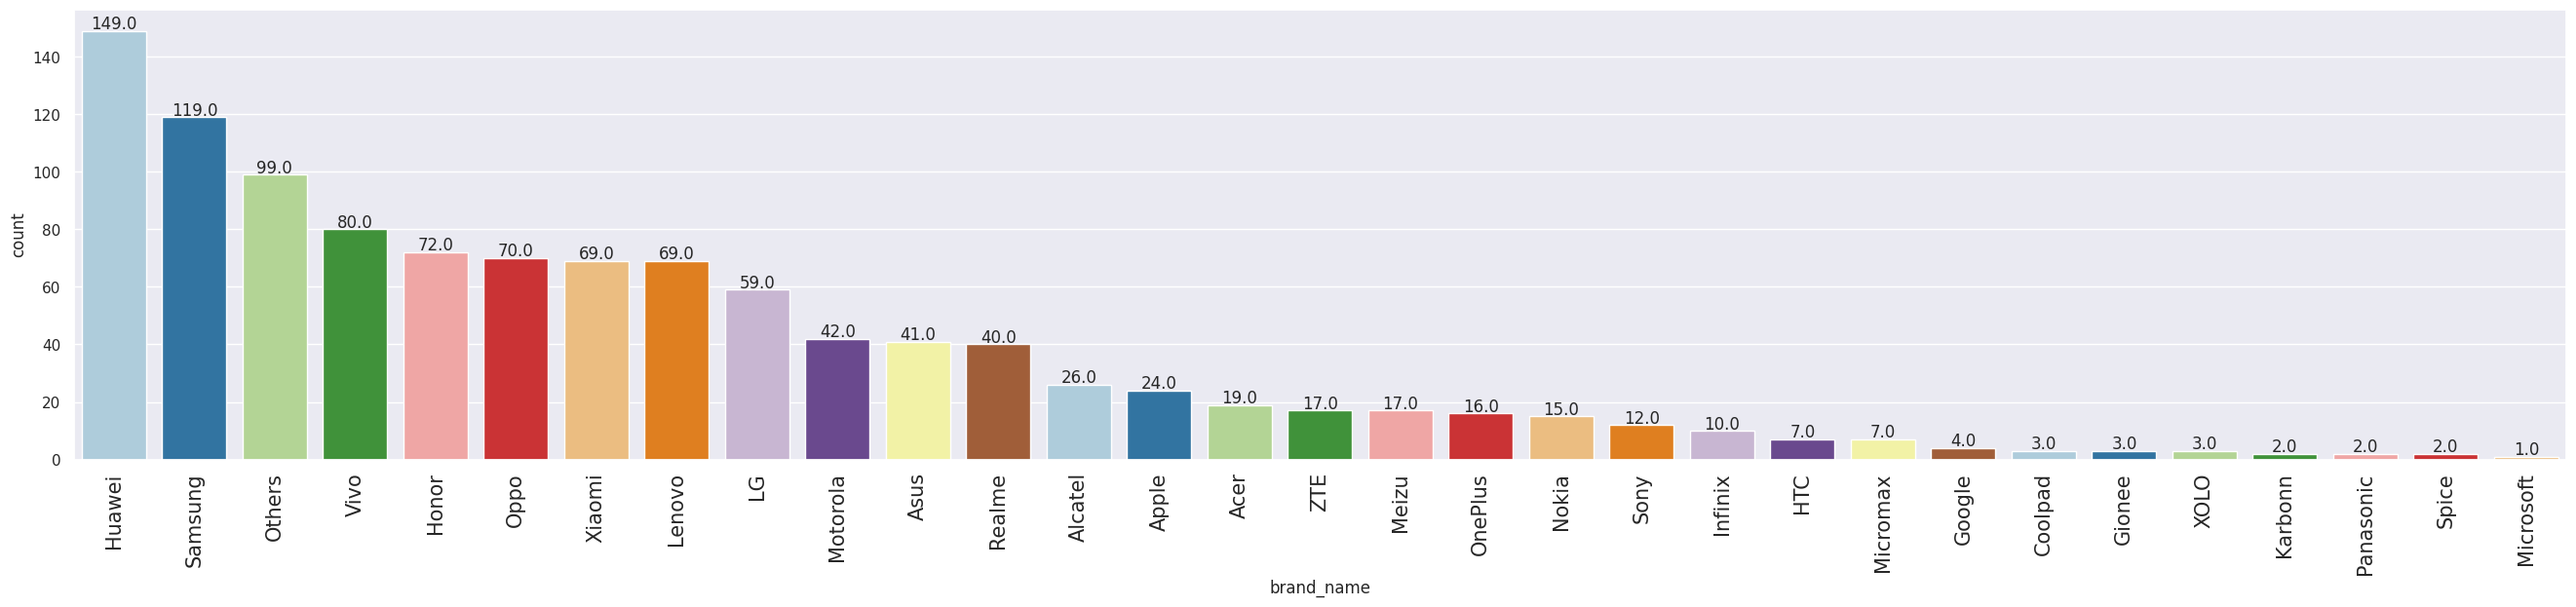

In [35]:
labeled_barplot(df_large_screen,'brand_name', perc=False, n=None)

**A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [36]:
# create data frame for devices offering greater than 8MP selfie cameras
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

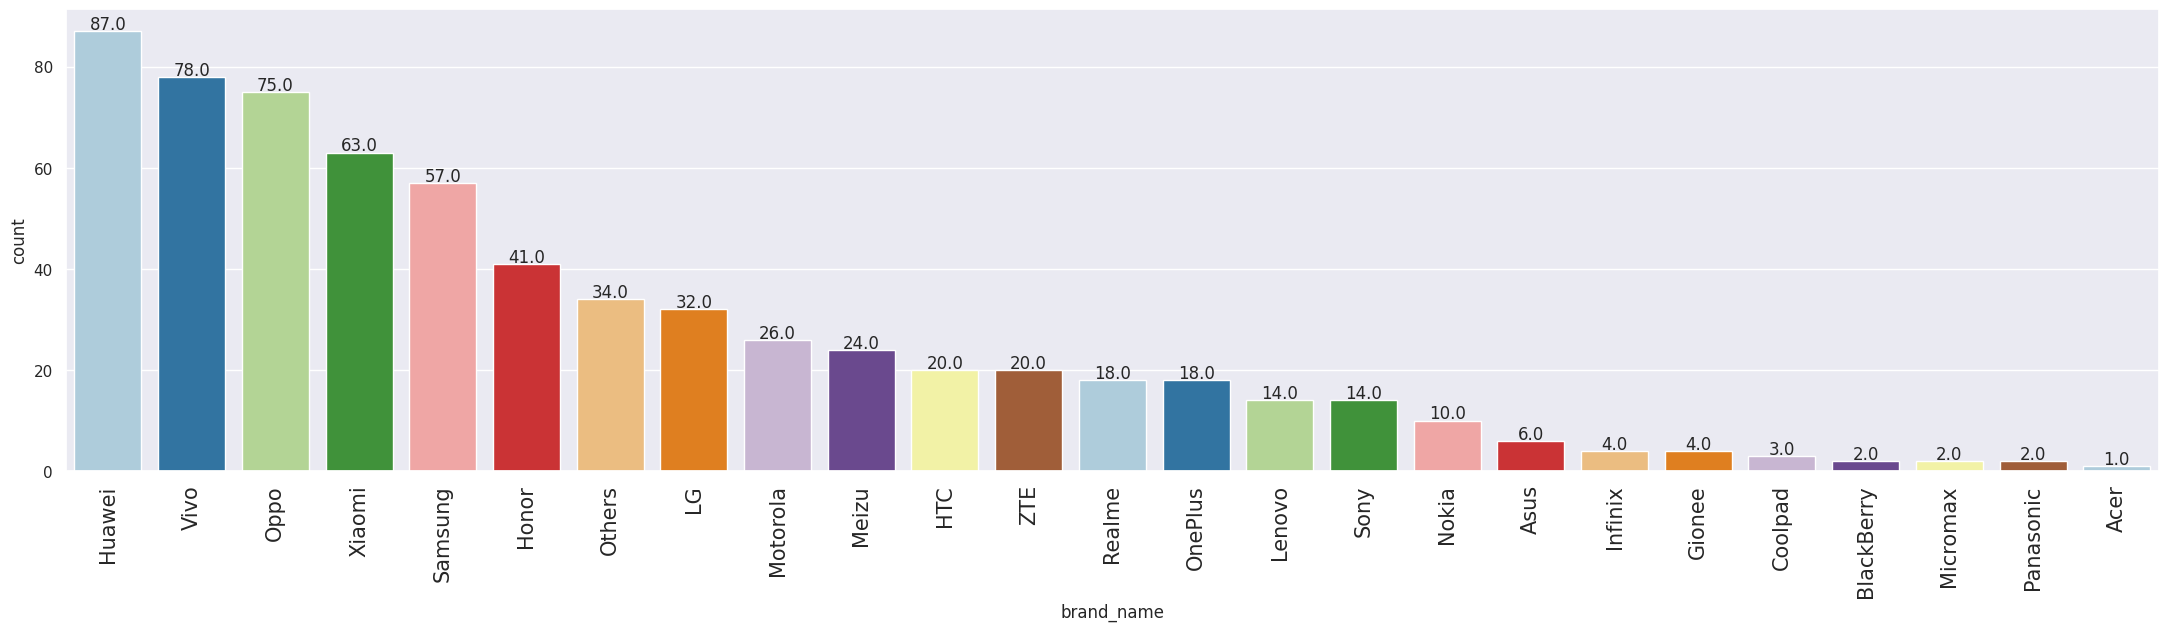

In [37]:
labeled_barplot(df_selfie_camera,'brand_name', perc=False, n=None)

**Which attributes are highly correlated with the normalized price of a used device?**

In [38]:
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
normalized_price_corr = numeric_df.corr()["normalized_used_price"].sort_values(ascending=False)
highly_correlated_cols = normalized_price_corr[abs(normalized_price_corr) > 0.5].index.tolist()

print("Attributes highly correlated with normalized used price:")
print(highly_correlated_cols)


Attributes highly correlated with normalized used price:
['normalized_used_price', 'normalized_new_price', 'screen_size', 'battery', 'selfie_camera_mp', 'main_camera_mp', 'ram', 'release_year']


**Lets look at relationship between categorical variables and the normalized price of used devices.**

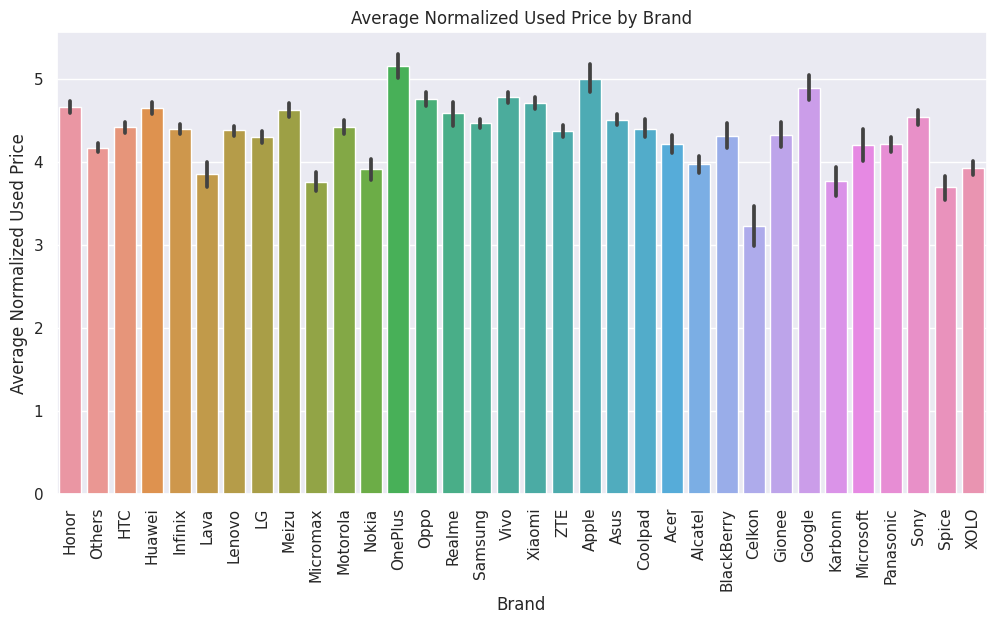

In [39]:
# create a bar plot showing the average normalized used price for different brands within a brand_name.
plt.figure(figsize=(12, 6))
sns.barplot(x='brand_name', y='normalized_used_price', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.title('Average Normalized Used Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Normalized Used Price')
plt.show()


*  Average normalized used price is changing brand to brand.
*  One Plus, Apple and Google are first 3 brands that has higher average normalized used price.



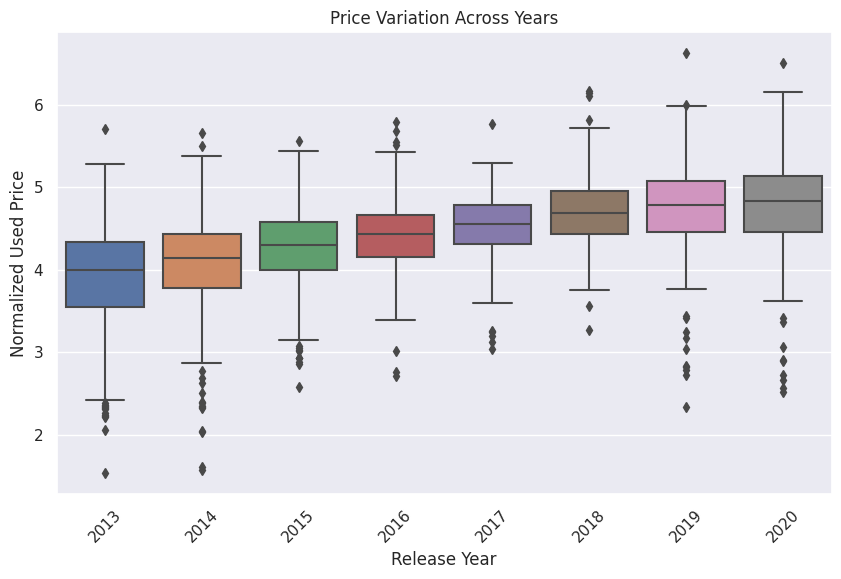

In [40]:
# visualize how the prices of used devices vary across different years and compare the prices for phones
plt.figure(figsize=(10, 6))
sns.boxplot(x='release_year', y='normalized_used_price', data=df)
plt.xticks(rotation=45)
plt.title('Price Variation Across Years')
plt.xlabel('Release Year')
plt.ylabel('Normalized Used Price')
plt.show()


*   As years of release increase, normalized used price also increase. That shows the positive correlation between release yaer and the price for used devices.
*  Devices that release year is closer to 2021 are sold at higher price.



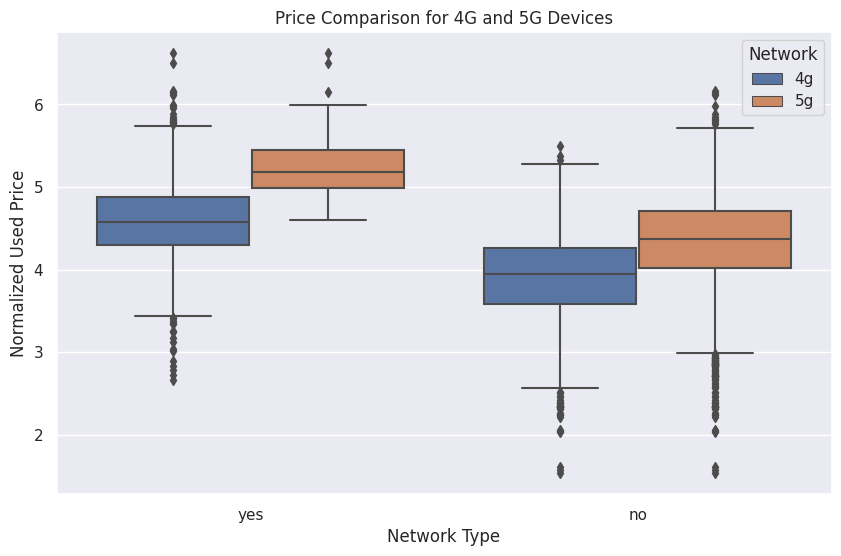

In [41]:
# visualize how prices of used devices differ between phones and tablets offering 4G and 5G networks
plt.figure(figsize=(10, 6))
network_types = ['4g', '5g']

# Concatenating the data for '4g' and '5g' networks for comparison
melted_df = pd.melt(df, value_vars=network_types, id_vars='normalized_used_price', var_name='Network', value_name='Network_Type')

sns.boxplot(x='Network_Type', y='normalized_used_price', hue='Network', data=melted_df)
plt.title('Price Comparison for 4G and 5G Devices')
plt.xlabel('Network Type')
plt.ylabel('Normalized Used Price')
plt.legend(title='Network')
plt.show()


*   Devices which has 4g and 5g features are sold for higher price.
*   Devices has 5g feature sold for highest price.




## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [42]:
# create a copy of the data
df1 = df.copy()

In [43]:
# check missing values across each columns
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [44]:
# impute missing values in cols_impute with median by grouping the data on release year and brand name
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year', 'brand_name'])[col].transform("median")
    )

# checking for missing values after imputation
missing_values = df1.isnull().sum()
print(missing_values)


brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


In [45]:
# impute the remaining missing values in the data by the column medians grouped by brand_name
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    )

# checking for missing values after imputation
missing_values_after = df1[cols_impute].isnull().sum()
print(missing_values_after)


main_camera_mp      10
selfie_camera_mp     0
battery              0
weight               0
dtype: int64


In [46]:
# Impute missing values in 'main_camera_mp' column with median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# Check for missing values after imputation
missing_values_after = df1["main_camera_mp"].isnull().sum()
print("Missing values in 'main_camera_mp' after imputation:", missing_values_after)


Missing values in 'main_camera_mp' after imputation: 0


### Feature Engineering

**Lets create a new column 'years_since_release' from the 'release_year' column.**

In [47]:
# create a new column 'years_since_release' from the 'release_year' column
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

###Outlier Detection

**Lets check for outliers by using boxplot**

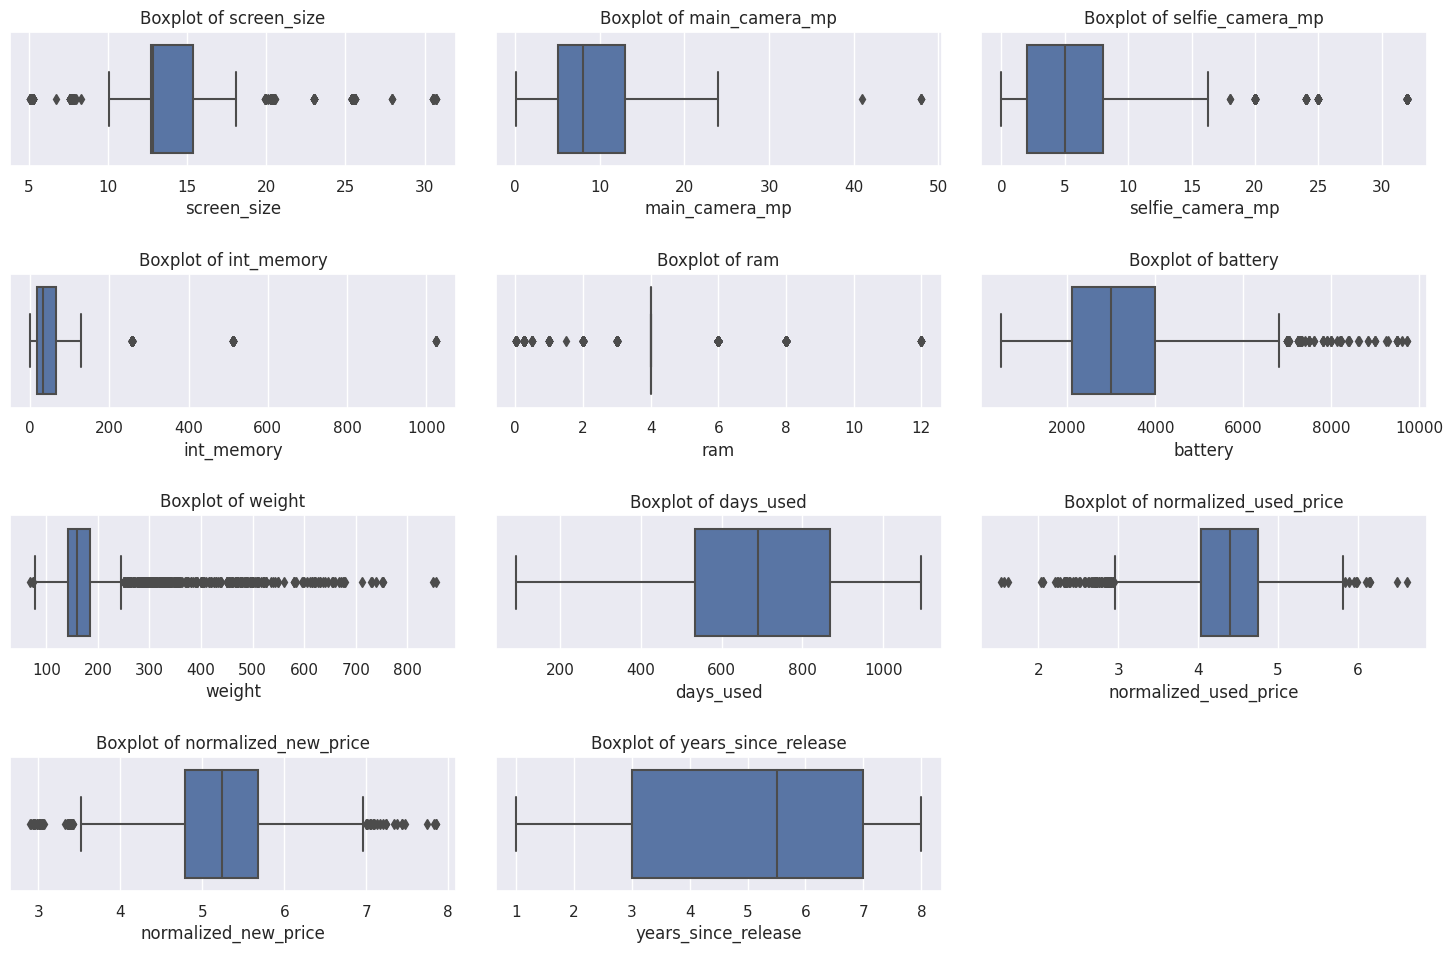

In [48]:
# outlier detection by using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
num_cols_count = len(num_cols)

plt.figure(figsize=(15, 10))
rows = int(np.ceil(num_cols_count / 3))  # Adjust the number of columns per row

for i, variable in enumerate(num_cols):
    plt.subplot(rows, 3, i + 1)  # Adjust the number of columns per row
    sns.boxplot(data=df1, x=variable)
    plt.title(f"Boxplot of {variable}")
    plt.tight_layout(pad=2)

plt.show()




*  'weight' variable has the most outliers.
*   All variables except days_used and years_since_release has outliers.



## EDA

**Lets explore the data once again after manipulating it.**

In [49]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


In [50]:
df1.shape

(3454, 15)

In [51]:
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.617597,4.749438,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3454.0,6.555067,6.968440,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3454.0,54.528474,84.934991,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3454.0,4.032620,1.368598,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3454.0,3132.577446,1298.884193,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3454.0,182.636856,88.360445,69.000000,142.000000,160.000000,185.000000,855.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433
normalized_new_price,3454.0,5.233107,0.683637,2.901422,4.790342,5.245892,5.673718,7.847841


In [52]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
days_used                0
normalized_used_price    0
normalized_new_price     0
years_since_release      0
dtype: int64

Now, we dont have any missing value in our data frame.

##Data Preparation for Modeling##

###Split Data###

In [53]:
# Assuming 'normalized_used_price' is the column representing the target variable and other columns are features in DataFrame df1
# Define the independent variables (features) X and the dependent variable (target) y
X = df1.drop('normalized_used_price', axis=1)  # Exclude 'normalized_used_price' column from features
y = df1['normalized_used_price']  # Select 'normalized_used_price' as the target variable

print(X.head())
print()
print(y.head())


  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [54]:
# let's add the intercept to data
X = sm.add_constant(X)

###Dummy Variables

In [55]:
# let X contains the independent features with categorical columns

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()


,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [56]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 'test_size=0.3' specifies a 70:30 split (70% train, 30% test)
# 'random_state=42' sets a seed for reproducibility

# Print the shapes of train and test sets (optional)
print("Train set shapes - X_train:", x_train.shape, "y_train:", y_train.shape)
print("Test set shapes - X_test:", x_test.shape, "y_test:", y_test.shape)


Train set shapes - X_train: (2417, 49) y_train: (2417,)
Test set shapes - X_test: (1037, 49) y_test: (1037,)


In [57]:
print(x_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
1744    1.0        10.34            13.0               1.3        32.0  4.0   
3141    1.0        10.29             8.0               2.0        32.0  4.0   
1233    1.0        12.83            13.0               5.0        32.0  4.0   
3046    1.0        10.24             5.0               0.3        16.0  4.0   
2649    1.0        11.81             8.0               1.9        32.0  4.0   

      battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
1744   2440.0   121.0        632              5.477969  ...                 0   
3141   1800.0   166.0        828              4.593604  ...                 0   
1233   2600.0   165.0        620              5.523179  ...                 0   
3046   2000.0   150.0        739              4.939640  ...                 0   
2649   2100.0   134.0        785              4.702751  ...                 0   

      brand_name_Vivo  brand_name_XOLO

In [58]:
print(x_test.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
511     1.0        17.78             2.0               0.3        16.0  4.0   
51      1.0        20.42            13.0               8.0        64.0  4.0   
1171    1.0        12.70            13.0               5.0        32.0  4.0   
2282    1.0        17.78             0.3               0.3        16.0  4.0   
557     1.0        10.24             5.0               0.3        16.0  4.0   

      battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
511    2820.0   260.0        976              4.377140  ...                 0   
51     6100.0   320.0        462              5.556287  ...                 0   
1171   2300.0   149.8        948              5.019199  ...                 0   
2282   3000.0   326.0        626              4.865532  ...                 0   
557    1700.0    96.0        831              4.866996  ...                 0   

      brand_name_Vivo  brand_name_XOLO

## Model Building - Linear Regression

In [59]:
x_train.isnull().sum()

const                    0
screen_size              0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
days_used                0
normalized_new_price     0
years_since_release      0
brand_name_Alcatel       0
brand_name_Apple         0
brand_name_Asus          0
brand_name_BlackBerry    0
brand_name_Celkon        0
brand_name_Coolpad       0
brand_name_Gionee        0
brand_name_Google        0
brand_name_HTC           0
brand_name_Honor         0
brand_name_Huawei        0
brand_name_Infinix       0
brand_name_Karbonn       0
brand_name_LG            0
brand_name_Lava          0
brand_name_Lenovo        0
brand_name_Meizu         0
brand_name_Micromax      0
brand_name_Microsoft     0
brand_name_Motorola      0
brand_name_Nokia         0
brand_name_OnePlus       0
brand_name_Oppo          0
brand_name_Others        0
brand_name_Panasonic     0
brand_name_Realme        0
b

In [60]:
import statsmodels.api as sm

# x_train and y_train contain the training data

# Fit the OLS model
olsmodel = sm.OLS(y_train, x_train).fit()

# Print the summary of the OLS model
print(olsmodel.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.849
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     277.1
Date:                   Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                           02:46:45   Log-Likelihood:                 125.15
No. Observations:                   2417   AIC:                            -152.3
Df Residuals:                       2368   BIC:                             131.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------



Interpretation of OLS Regression Results:

- R-squared (R²) and Adjusted R-squared: An R-squared value of 0.849 suggests that approximately 84.9% of the variance in the normalized price is explained by the model.

- Coefficients (coef): Each coefficient represents the estimated effect of an independent variable on the dependent variable, holding other variables constant. For instance:
   Positive coefficients (e.g., 'screen_size', 'main_camera_mp', 'selfie_camera_mp') indicate a positive relationship with the normalized price.
   Negative coefficients (e.g., 'years_since_release', '5g_yes') indicate a negative relationship with the normalized price.

- P-values (P>|t|): These values assess the statistical significance of each coefficient. A smaller p-value (usually < 0.05) suggests that the coefficient is statistically significant. Variables with higher p-values may be considered less significant.

- Prob (F-statistic): This is the probability associated with the overall F-statistic. A low probability (< 0.05) indicates that at least one independent variable has a significant effect on the dependent variable.

- Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis: These statistics assess the model's assumptions and goodness of fit. For instance, skewness and kurtosis measure the departure from normality.

- Condition Number: Indicates the presence of multicollinearity. A high condition number (>100 or >1000) suggests strong multicollinearity among the independent variables.


## Model Performance Check

**Lets check the performance of the model by using different metrics.**

 - Lets write functions to compute various metrics for evaluating regression models, such as adjusted R-squared, RMSE, MAE, and MAPE. To check the performance of our regression model on the test set, we can use the model_performance_regression.

In [61]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [62]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229761,0.178533,0.848887,0.845758,4.293664


- A lower RMSE and MAE, higher R-squared and adjusted R-squared, and a lower MAPE generally indicate better model performance.

In [63]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf


Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239062,0.188692,0.832176,0.823844,4.513288


- Overall, these metrics suggest that the model performs reasonably well on the test dataset, with relatively low errors (RMSE and MAE) and a decent ability to explain the variance (R-squared and adjusted R-squared)

All p values of the dummy variables about the brand of the device are greater than 0.05. Therefore, lets drop brand_name column and then recheck the performance of the model.

In [64]:
# List all columns related to brand_name dummy variables
brand_cols = [col for col in x_train.columns if col.startswith('brand_name_')]

# Drop all brand_name related dummy variables from x_train
x_train2 = x_train.drop(brand_cols, axis=1)

# List all columns related to brand_name dummy variables in the test dataset
brand_cols_test = [col for col in x_test.columns if col.startswith('brand_name_')]

# Drop all brand_name related dummy variables from x_test
x_test2 = x_test.drop(brand_cols_test, axis=1)


# Fit the model with the modified x_train
olsmodel2 = sm.OLS(y_train, x_train2)
olsres_1 = olsmodel2.fit()

print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)


R-squared: 0.845 
Adjusted R-squared: 0.844


By dropping dummy variables brand_name_ ,adj R-squared decreased by 0.002

In [65]:
import statsmodels.api as sm

# x_train2 and y_train contain the training data

# Fit the OLS model
olsmodel2 = sm.OLS(y_train, x_train2).fit()

# Print the summary of the OLS model
print(olsmodel2.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     874.0
Date:                   Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                           02:46:45   Log-Likelihood:                 96.114
No. Observations:                   2417   AIC:                            -160.2
Df Residuals:                       2401   BIC:                            -67.58
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

We see that in new OSL regression results, dummy variables for OS types on which the device run (os_ ) has p values greater than 0.05. Therefore, lets drop the columns that have these variables and see how R-squared and adjusted R are changing.

In [66]:
# List all columns related to OS types (os_ prefixes)
os_cols = [col for col in x_train2.columns if col.startswith('os_')]

# Drop all OS-related columns from x_train
x_train3 = x_train2.drop(os_cols, axis=1)

# List all columns related to OS types (os_ prefixes)
os_cols = [col for col in x_test2.columns if col.startswith('os_')]

# Drop all OS-related columns from x_test
x_test3 = x_test2.drop(os_cols, axis=1)


# Fit the model with the modified x_train
olsmodel3 = sm.OLS(y_train, x_train3)
olsres_2 = olsmodel3.fit()

print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)


R-squared: 0.845 
Adjusted R-squared: 0.844


Both R-squared and adj. R-squared values stayed the same after dropping columns related to OS.

In [67]:
import statsmodels.api as sm

# x_train3 and y_train contain the training data

# Fit the OLS model
olsmodel3 = sm.OLS(y_train, x_train3).fit()

# Print the summary of the OLS model
print(olsmodel3.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.844
Method:                    Least Squares   F-statistic:                     1092.
Date:                   Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                           02:46:45   Log-Likelihood:                 94.290
No. Observations:                   2417   AIC:                            -162.6
Df Residuals:                       2404   BIC:                            -87.31
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.



- We will be checking the following Linear Regression assumptions:

   1- No Multicollinearity

   2-Linearity of variables

   3-Independence of error terms

  4-Normality of error terms

  5-No Heteroscedasticity



###Test for Multicollinearity

Lets test for multicollinearity by using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for predictors in the training set (X_train3)
vif_series_train = pd.Series(
    [variance_inflation_factor(x_train3.values, i) for i in range(x_train3.shape[1])],
    index=x_train3.columns,
)

print("VIF values for training set:\n")
print(vif_series_train)

VIF values for training set:

const                   95.880541
screen_size              6.462515
main_camera_mp           2.055485
selfie_camera_mp         2.565127
int_memory               1.224326
ram                      2.008373
battery                  3.836712
weight                   5.554191
days_used                2.472959
normalized_new_price     2.570473
years_since_release      4.505587
4g_yes                   2.310097
5g_yes                   1.695259
dtype: float64


  - The const variable might be related to the intercept and typically has a high VIF (it's not a predictor but an intercept term).
  - const, weight, screen_size and years_since_release have relatively high VIF values, indicating potential multicollinearity issues with other predictors.

In [69]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmod = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmod.rsquared_adj)
        rmse.append(np.sqrt(olsmod.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [70]:
col_list = ['screen_size']  # 'screnn_size' contains the columns with high VIF
# Check the effect on model performance after dropping specified columns from the training data
res = treating_multicollinearity(x_train3, y_train, col_list)
res


,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.837871,0.238037


- Adj R-squared dropped slightly.
- Lets check new VIF values after dropping "screen_size"

In [71]:
col_to_drop = 'screen_size'

# Drop the specified column from the train and test data
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF after dropping the specified column
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = calculate_vif(x_train4)
print(vif_result)


                 Feature        VIF
0                  const  88.136335
1         main_camera_mp   2.044983
2       selfie_camera_mp   2.562639
3             int_memory   1.220129
4                    ram   1.970646
5                battery   3.555564
6                 weight   2.737859
7              days_used   2.467377
8   normalized_new_price   2.512565
9    years_since_release   4.389092
10                4g_yes   2.309453
11                5g_yes   1.678568


- The variance inflation factor (VIF) values were recalculated after dropping this column. The remaining features now show reduced multicollinearity as indicated by the lowered VIF values. This suggests reduced correlation among the remaining features.


- Lets check p-values again.


In [72]:
# x_train4 and y_train contain the training data

# Fit the OLS model
olsmodel4 = sm.OLS(y_train, x_train4).fit()

# Print the summary of the OLS model
print(olsmodel4.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1136.
Date:                   Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                           02:46:46   Log-Likelihood:                 45.628
No. Observations:                   2417   AIC:                            -67.26
Df Residuals:                       2405   BIC:                             2.228
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

- 'battery' and 'int_memory' coefficients have p-values above 0.05, indicating they might not be statistically significant in explaining the target variable. Additionally, the condition number of 3.3e+04 suggests potential multicollinearity issues.
- Lets drop column 'battery'

In [73]:
# Drop the 'battery' column from both train and test data
x_train5 = x_train4.drop('battery', axis=1)
x_test5 = x_test4.drop('battery', axis=1)


In [74]:
# x_train5 and y_train contain the training data

# Fit the OLS model
olsmodel5 = sm.OLS(y_train, x_train5).fit()

# Print the summary of the OLS model
print(olsmodel5.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1250.
Date:                   Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                           02:46:46   Log-Likelihood:                 45.396
No. Observations:                   2417   AIC:                            -68.79
Df Residuals:                       2406   BIC:                            -5.099
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [75]:
# Drop the 'int_memory' column from both train and test data
x_train6 = x_train5.drop('int_memory', axis=1)
x_test6 = x_test5.drop('int_memory', axis=1)


In [76]:
# x_train6 and y_train contain the training data

# Fit the OLS model
olsmodel6 = sm.OLS(y_train, x_train6).fit()

# Print the summary of the OLS model
print(olsmodel6.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1388.
Date:                   Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                           02:46:46   Log-Likelihood:                 44.649
No. Observations:                   2417   AIC:                            -69.30
Df Residuals:                       2407   BIC:                            -11.40
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

- The updated results show that the 'int_memory' column removal didn't significantly affect the coefficients of other features. However,the 'days_used' feature still has a p-value greater than 0.05, indicating it might not be statistically significant in predicting the target variable.
- We should consider further analysis or possibly dropping this feature as well.

In [77]:
col_to_drop = 'days_used'

# Drop the specified column from the train and test data
x_train7 = x_train6.loc[:, ~x_train6.columns.str.startswith(col_to_drop)]
x_test7 = x_test6.loc[:, ~x_test6.columns.str.startswith(col_to_drop)]

# Check VIF after dropping the specified column
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = calculate_vif(x_train7)
print(vif_result)

                Feature        VIF
0                 const  84.310306
1        main_camera_mp   1.948906
2      selfie_camera_mp   2.475466
3                   ram   1.911049
4                weight   1.228056
5  normalized_new_price   2.400419
6   years_since_release   2.638205
7                4g_yes   2.192522
8                5g_yes   1.621826


- Most of your predictors have VIF values well below 5, indicating a relatively low level of multicollinearity among these variables.

**Lets check R- squared and adj. R-squared values and OLS regression results after we drop 'days_used' column.**

In [78]:
# Fit the model with the modified x_train7
olsmodel7 = sm.OLS(y_train, x_train7)
olsres_6 = olsmodel7.fit()

print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

# Further evaluate the model performance on the test set using x_test7

R-squared: 0.838 
Adjusted R-squared: 0.838


In [79]:
# x_train7 and y_train contain the training data

# Fit the OLS model
olsmodel7 = sm.OLS(y_train, x_train7).fit()

# Print the summary of the OLS model
print(olsmodel7.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1562.
Date:                   Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                           02:46:46   Log-Likelihood:                 44.172
No. Observations:                   2417   AIC:                            -70.34
Df Residuals:                       2408   BIC:                            -18.23
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

- The coefficients, standard errors, t-values, and p-values indicate the significance of each variable in predicting the target.
- 'ram', 'normalized_new_price', 'main_camera_mp', 'selfie_camera_mp', and 'weight' seem to have relatively low p-values, suggesting they might be statistically significant predictors.

- Additionally, the 'years_since_release' variable has a negative coefficient, indicating an inverse relationship with the target.

**After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.846 to 0.838). This shows that these variables did not have much predictive power.**

In [80]:
print(x_train7.shape[1])  # This will print the number of columns (features) in x_train7


9


In [81]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel7, x_train7, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237589,0.184111,0.838414,0.83781,4.455122


In [82]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel7, x_test7, y_test)
olsmodel2_test_perf


Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239989,0.188992,0.830872,0.82939,4.534151


- It seems like my model is performing consistently well on both the training and test data, which is a good sign.
- The RMSE and MAE are relatively low, indicating that the model's predictions are close to the actual values.
- Additionally, the R-squared and adjusted R-squared values are relatively high, suggesting that a significant proportion of the variance in the target variable is explained by the model.

- Consistent performance between training and test data indicates that the model has not overfitted or underfitted significantly. This balance is essential for the model's generalization to new, unseen data.


#Test For Linearity And Independence


- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [83]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.299760,-0.037785
3141,4.175156,3.863044,0.312112
1233,4.117410,4.422986,-0.305576
3046,3.782597,3.838826,-0.056228
2649,3.981922,3.908022,0.073900


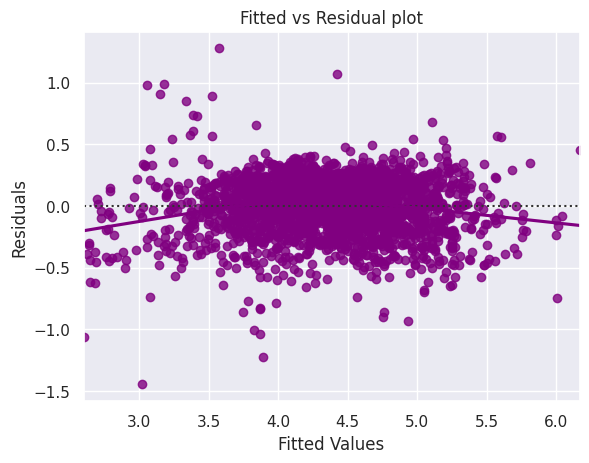

In [84]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- In a residual plot, if we observe a random scatter of points around the horizontal line (at 0), it indicates that the variance of the errors is consistent across all predicted values.
- Therefore, we can say the model is linear and residuals are independent.

#Test For Normality

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

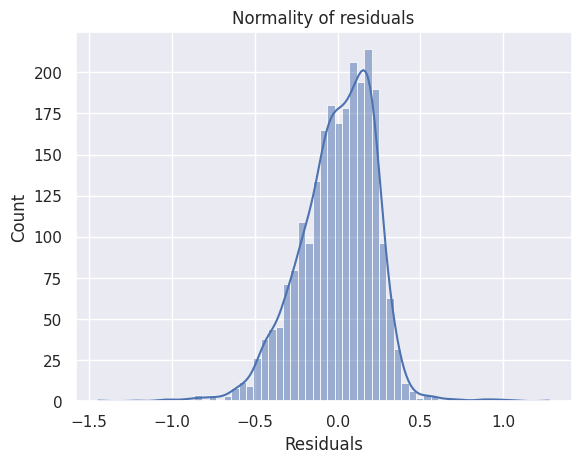

In [85]:
sns.histplot(data=df_pred, x='Residuals', kde=True)
plt.title("Normality of residuals")
plt.show()


- The residual terms are slightly skewed to the left.

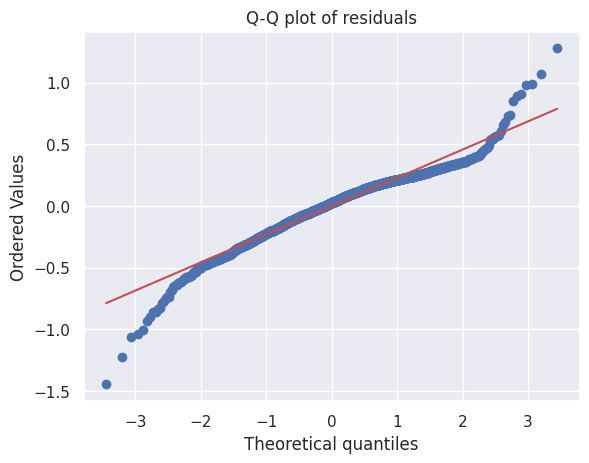

In [86]:
import pylab
import scipy.stats as stats

# Assuming 'residuals' contains the residuals data
stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab)
plt.title("Q-Q plot of residuals")
plt.show()


- Most of the points are lying on the straight line in QQ plot

In [87]:
from scipy.stats import shapiro

# Assuming 'residuals' contains the residuals data
stat, p_value = shapiro(df_pred['Residuals'])

print("Shapiro-Wilk Test:")
print(f"Test Statistic: {stat}")
print(f"P-value: {p_value}")


Shapiro-Wilk Test:
Test Statistic: 0.9635675549507141
P-value: 3.1806631095935104e-24


- Based on this test result, the null hypothesis (that the data is normally distributed) is rejected, indicating that the residuals significantly deviate from a normal distribution.
- Strictly speaking - the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal


#Test For Homoscedasticity

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [89]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train7)
lzip(name, test)

[('F statistic', 0.9465723563939281), ('p-value', 0.8290872249127756)]

- Since p-value > 0.05 we can say that the residuals are homoscedastic.

### All the assumptions of linear regression are now satisfied. Let's check the summary of our final model.

## Final Model

In [90]:
olsmodel_final = sm.OLS(y_train, x_train7).fit()
print(olsmodel_final.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1562.
Date:                   Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                           02:50:22   Log-Likelihood:                 44.172
No. Observations:                   2417   AIC:                            -70.34
Df Residuals:                       2408   BIC:                            -18.23
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observations:
- Approximately 83.8% of the variance in the dependent variable is explained by the independent variables included in the model.
- Similar to R-squared but adjusted for the number of predictors in the model. It's also around 83.8%, indicating a good fit.
- The F-statistic tests the overall significance of the model. A low p-value (close to zero) suggests that at least one independent variable significantly predicts the dependent variable. Here, the p-value is effectively zero, indicating the model is significant overall.
- Const: The intercept of the regression equation is 1.4710. It's the predicted value of 'normalized_used_price' when all independent variables are zero.
- Main_camera_mp, Selfie_camera_mp, Ram, Weight, Normalized_new_price,  4g_yes have positive coefficients while Years_since_release and negative coeeficients.Each unit change in these variables results in the change of 'normalized_used_price' according to the coefficient value, given all other variables are constant.

In [91]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel7, x_test7, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239989,0.188992,0.830872,0.82939,4.534151


In [92]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel7, x_train7, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237589,0.184111,0.838414,0.83781,4.455122


- The model is performing consistently well on both the training and test data.
- The RMSE and MAE are relatively low, indicating that the model's predictions are close to the actual values.
- Additionally, the R-squared and adjusted R-squared values are relatively high, suggesting that a significant proportion of the variance in the target variable is explained by the model.

- Consistent performance between training and test data indicates that the model has not overfitted or underfitted significantly. This balance is essential for the model's generalization to new, unseen data.


##Predictions

**Lets print the linear regression equation.**

In [93]:
# let's check the model parameters
olsres_6.params

const                   1.471000
main_camera_mp          0.024310
selfie_camera_mp        0.012399
ram                     0.036821
weight                  0.001646
normalized_new_price    0.433439
years_since_release    -0.032820
4g_yes                  0.043276
5g_yes                 -0.116627
dtype: float64

In [94]:
# Let us write the equation of linear regression
Equation = "Normalized Used Price ="
print(Equation, end=" ")
for i in range(len(x_train7.columns)):
    if i == 0:
        print(olsres_6.params[i], "+", end=" ")
    elif i != len(x_train7.columns) - 1:
        print(
            olsres_6.params[i],
            "* (",
            x_train7.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_6.params[i], "* (", x_train7.columns[i], ")")

Normalized Used Price = 1.4709995513070717 + 0.02430970340877544 * ( main_camera_mp ) +  0.012398536935614223 * ( selfie_camera_mp ) +  0.03682117135984637 * ( ram ) +  0.0016462076251945706 * ( weight ) +  0.4334394322552675 * ( normalized_new_price ) +  -0.03282027252875066 * ( years_since_release ) +  0.04327551997499909 * ( 4g_yes ) +  -0.1166271600845224 * ( 5g_yes )


## Actionable Insights and Recommendations

Based on the regression model results, here are actionable insights and recommendations for ReCell:

**Pricing Strategy:**

- **New Price Influence**: The normalized price of a new device significantly affects the price of a used/refurbished device. Keep a close eye on market trends in new device pricing to adjust used device pricing accordingly.

- **Camera Quality:** Both main and selfie camera resolutions have a positive influence on the device's price. Highlight the camera quality when marketing devices with higher resolutions.

- **RAM and Weight Impact:** Higher RAM positively affects price, while weight slightly influences it. Emphasize devices with larger RAM capacities and consider the weight factor as a secondary selling point.

- **Technological Advancements:** The presence of 4G positively affects prices, while 5G has a negative impact. Leverage 4G capabilities in marketing and consider implications of 5G adoption on pricing strategies.

**Lifecycle and Market Dynamics:**

- **Device Age: **Older devices face a price drop, as indicated by the negative coefficient for 'years_since_release.' Adjust pricing policies to reflect the decreasing value of older models.

- **Market Adaptation:** Continuously evaluate market dynamics, technological advancements, and consumer preferences to adapt pricing strategies accordingly. Monitor and update the model periodically to incorporate changing trends.

**Business Considerations:**

- **Warranty and Assurance:** Offer warranties and guarantees on used devices to enhance consumer trust and drive sales.

- **Environmental Angle:** Promote the environmental benefits of buying used/refurbished devices. Highlight recycling initiatives and how purchasing second-hand devices reduces electronic waste.

- **Partnerships and Offers:** Collaborate with third-party vendors/platforms to offer attractive deals and benefits for refurbished devices. Forge partnerships with service providers to enhance customer offers.

By implementing these insights, ReCell can formulate a robust pricing strategy, enhance marketing approaches, and cater to the evolving demands of the used/refurbished device market, maximizing their market share and profitability.


-


___